In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy as scs

from scipy import stats
from tqdm import tqdm

plt.style.use("seaborn")

%matplotlib inline

In [2]:
pd.options.display.max_columns = 500

# Загрузка данных

In [3]:
DATA_ROOT = "/home/ivb/nvme/digital_reputation_2019/data/"

TRAIN_X1 = os.path.join(DATA_ROOT, "train", "X1.csv")
TRAIN_X2 = os.path.join(DATA_ROOT, "train", "X2.csv")
TRAIN_X3 = os.path.join(DATA_ROOT, "train", "X3.csv")
TRAIN_Y = os.path.join(DATA_ROOT, "train", "Y.csv")

TEST_X1 = os.path.join(DATA_ROOT, "test", "X1.csv")
TEST_X2 = os.path.join(DATA_ROOT, "test", "X2.csv")
TEST_X3 = os.path.join(DATA_ROOT, "test", "X3.csv")

In [4]:
train_x1_df = pd.read_csv(TRAIN_X1)
train_x2_df = pd.read_csv(TRAIN_X2)
train_x3_df = pd.read_csv(TRAIN_X3)
train_y_df = pd.read_csv(TRAIN_Y)

In [5]:
train_y_df.head()

id  1  2  3  4  5
0   3  1  1  0  0  1
1   5  0  1  0  0  0
2   6  0  1  0  0  0
3   8  1  0  0  0  0
4  10  0  0  1  1  0

# X1

## Первый взгляд

На тестовые данные, конечно, смотреть не будем

In [6]:
train_x1_df.head()

id  1    2    3      4      5       6     7      8     9  10  11  12  13  \
0   3  1 -1.0 -1.0  107.0  255.0   537.0  10.0   41.0   0.0   1   0   0   0   
1   5  0  0.0  0.0   20.0    0.0   188.0   1.0   25.0   2.0   1   0   0   1   
2   6  1  0.0  0.0  158.0  155.0  3092.0   3.0  218.0  29.0   1   0   0   0   
3   8  1  0.0  0.0  102.0  343.0   341.0   0.0   24.0   2.0   1   0   0   0   
4  10  1  0.0  0.0    1.0    1.0    33.0   0.0   41.0   1.0   1   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  
0   0   0   0   0   0   0   0   0   1   0   1   0  
1   0   0   0   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0   1   0   0  
3   0   0   0   0   0   0   0   0   1   0   0   0  
4   0   1   0   0   0   0   0   0   1   0   1   0

In [7]:
train_x1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
id    4000 non-null int64
1     4000 non-null int64
2     4000 non-null float64
3     4000 non-null float64
4     4000 non-null float64
5     4000 non-null float64
6     4000 non-null float64
7     4000 non-null float64
8     4000 non-null float64
9     4000 non-null float64
10    4000 non-null int64
11    4000 non-null int64
12    4000 non-null int64
13    4000 non-null int64
14    4000 non-null int64
15    4000 non-null int64
16    4000 non-null int64
17    4000 non-null int64
18    4000 non-null int64
19    4000 non-null int64
20    4000 non-null int64
21    4000 non-null int64
22    4000 non-null int64
23    4000 non-null int64
24    4000 non-null int64
25    4000 non-null int64
dtypes: float64(8), int64(18)
memory usage: 812.6 KB


In [8]:
train_x1_df.describe()

id            1           2            3            4  \
count  4000.00000  4000.000000  4000.00000  4000.000000  4000.000000   
mean   4060.31125     0.486750    -0.03800    -0.019750   102.644750   
std    2310.14735     0.499887     0.41243     0.306404   359.096996   
min       3.00000     0.000000    -2.00000    -2.000000     0.000000   
25%    2077.75000     0.000000     0.00000     0.000000     2.000000   
50%    4066.00000     0.000000     0.00000     0.000000    14.000000   
75%    6073.25000     1.000000     0.00000     0.000000    69.000000   
max    8056.00000     1.000000     2.00000     2.000000  9967.000000   

                 5             6           7            8            9  \
count   4000.00000   4000.000000  4000.00000  4000.000000  4000.000000   
mean     184.29550    218.048500     8.08500    95.189000     2.919250   
std      616.33453    505.995188    60.90659   133.882325    27.433882   
min        0.00000      0.000000     0.00000     0.000000     0.000000   
25%        0.00000     61.000000     0.00000    22.000000     0.000000   
50%        0.00000    121.000000     1.00000    57.000000     1.000000   
75%       93.25000    221.000000     3.00000   117.000000     2.000000   
max    10000.00000  10000.000000  1989.00000  2409.000000  1396.000000   

                10           11           12           13           14  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.952500     0.097500     0.064250     0.409500     0.009750   
std       0.212732     0.296674     0.245228     0.491803     0.098272   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                15           16           17           18           19  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.046500     0.011750     0.009250     0.020000     0.001000   
std       0.210592     0.107772     0.095743     0.140018     0.031611   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                20           21           22           23           24  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.018500     0.027250     0.217000     0.120750     0.145000   
std       0.134768     0.162831     0.412254     0.325877     0.352145   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                25  
count  4000.000000  
mean      0.056250  
std       0.230433  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [9]:
train_x1_df.nunique()

id    4000
1        2
2        5
3        5
4      531
5      721
6      677
7      115
8      452
9       52
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
dtype: int64

In [10]:
(train_x1_df.iloc[:, 4:10] % 1.0 == 0).all()

4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

Итак, признаки 
<ul>
    <li>id - идентификатор</li>
    <li>1, 10-25 - бинарные</li>
    <li>4-9 - целочисленные, хотя и записаны как вещественные; у всех минимальное значение - 0, максимальное для 4-6 - 10000, для остальных между 1000-3000; у признака 9 относительно мало уникальных значений</li>
    <li>2, 3 - либо категориальные либо порядковые, множество значений [-2, -1, 0, 1, 2]</li>
</ul>
Теперь посмотрим на признаки подробнее

## Бинарные

Выведем на долю значения 1, хотя это и было получено в describe

In [11]:
binary_features = ["1"] + list(map(str, range(10, 26)))

In [12]:
train_x1_df[binary_features].head()

1  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
0  1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0
1  0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
2  1   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
3  1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
4  1   1   0   0   0   0   1   0   0   0   0   0   0   1   0   1   0

<BarContainer object of 17 artists>

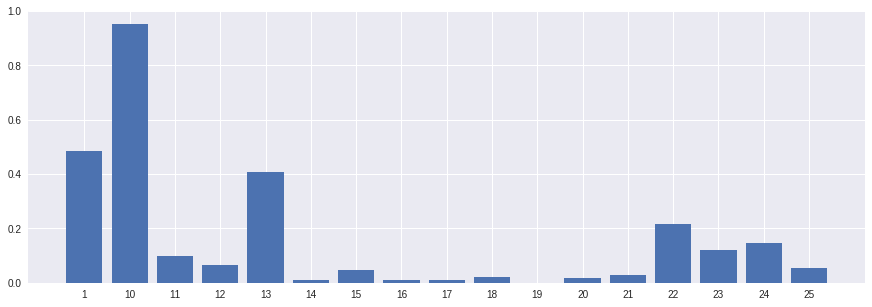

In [13]:
plt.figure(figsize=[15, 5])
p = train_x1_df[binary_features].mean()
plt.bar(p.index, p)

In [15]:
p * 4000

1     1947.0
10    3810.0
11     390.0
12     257.0
13    1638.0
14      39.0
15     186.0
16      47.0
17      37.0
18      80.0
19       4.0
20      74.0
21     109.0
22     868.0
23     483.0
24     580.0
25     225.0
dtype: float64

Некоторые признаки почти константные: 14-21, 10; особенно 19

Посмотрим на условные распределения признаков при условии ответа Y, будем строить отдельные графики для признаков 14-21 и остальных

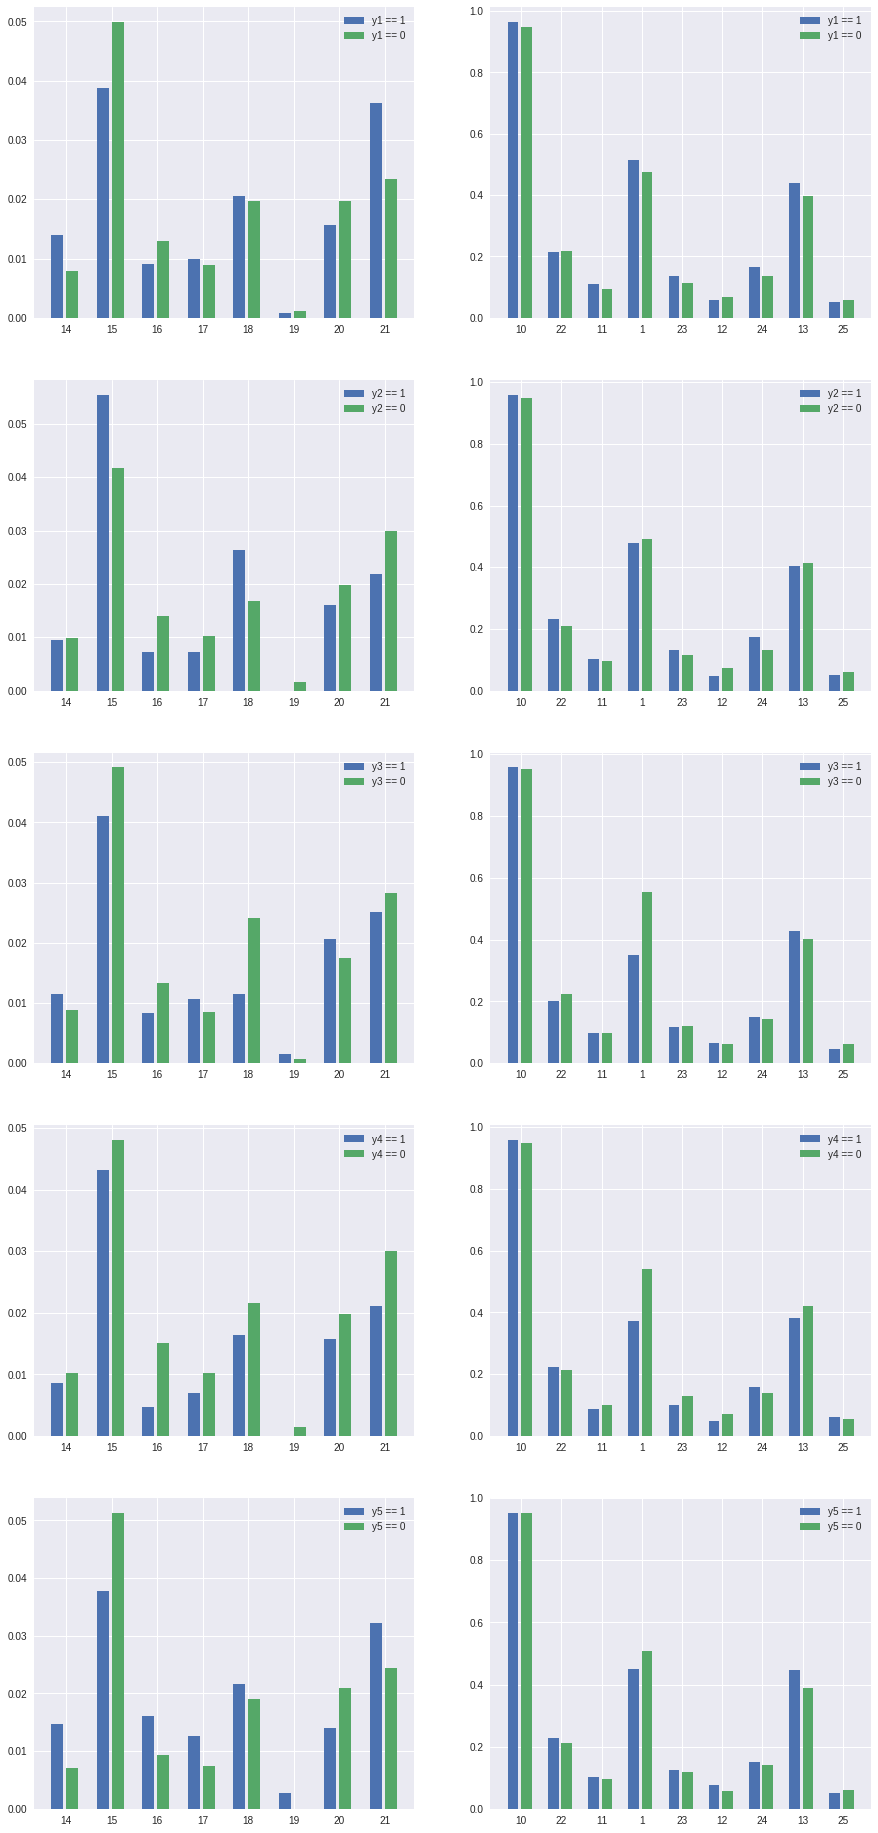

In [14]:
bf1 = list(map(str, range(14, 22)))
bf2 = list(set(binary_features) - set(bf1))

x1 = 1.5 * np.arange(len(bf1))
x2 = 1.5 * np.arange(len(bf2))
d = 0.5
w = 0.4

plt.figure(figsize=[15, 40])
for i in range(1, 6):
    idx = train_y_df[str(i)].astype(bool)
    
    plt.subplot(6, 2, 2 * i - 1)
    p = train_x1_df[idx][bf1].mean()
    plt.bar(x1, p, align="edge", width=w, tick_label=bf1, label="y" + str(i) + " == 1")
    p = train_x1_df[~idx][bf1].mean()
    plt.bar(x1 + d, p, align="edge", width=w, tick_label=bf1, label="y" + str(i) + " == 0")
    plt.legend()
    
    plt.subplot(6, 2, 2 * i)
    p = train_x1_df[idx][bf2].mean()
    plt.bar(x2, p, align="edge", width=w, tick_label=bf2, label="y" + str(i) + " == 1")
    p = train_x1_df[~idx][bf2].mean()
    plt.bar(x2 + d, p, align="edge", width=w, tick_label=bf2, label="y" + str(i) + " == 0")
    plt.legend()

Видим, что признак 19, который почти всегда 0, тем не менее позволяет, например для пятого таргета, сказать что ответ 1, если признак равен 1. Эту зависимость может обнаружить модель, но из за того что данных по этому признаку слишком мало, это приведет к переобучению

Некоторые признаки, например 10, скорее всего малоинформативны

Некоторые признаки полезны для некоторых таргетов, например 18 очевидно полезен для y2 и y3, 16 для y4

Возможно интерпретация этих графиков сложна, построим средние значения таргета для различных бинарных переменных.

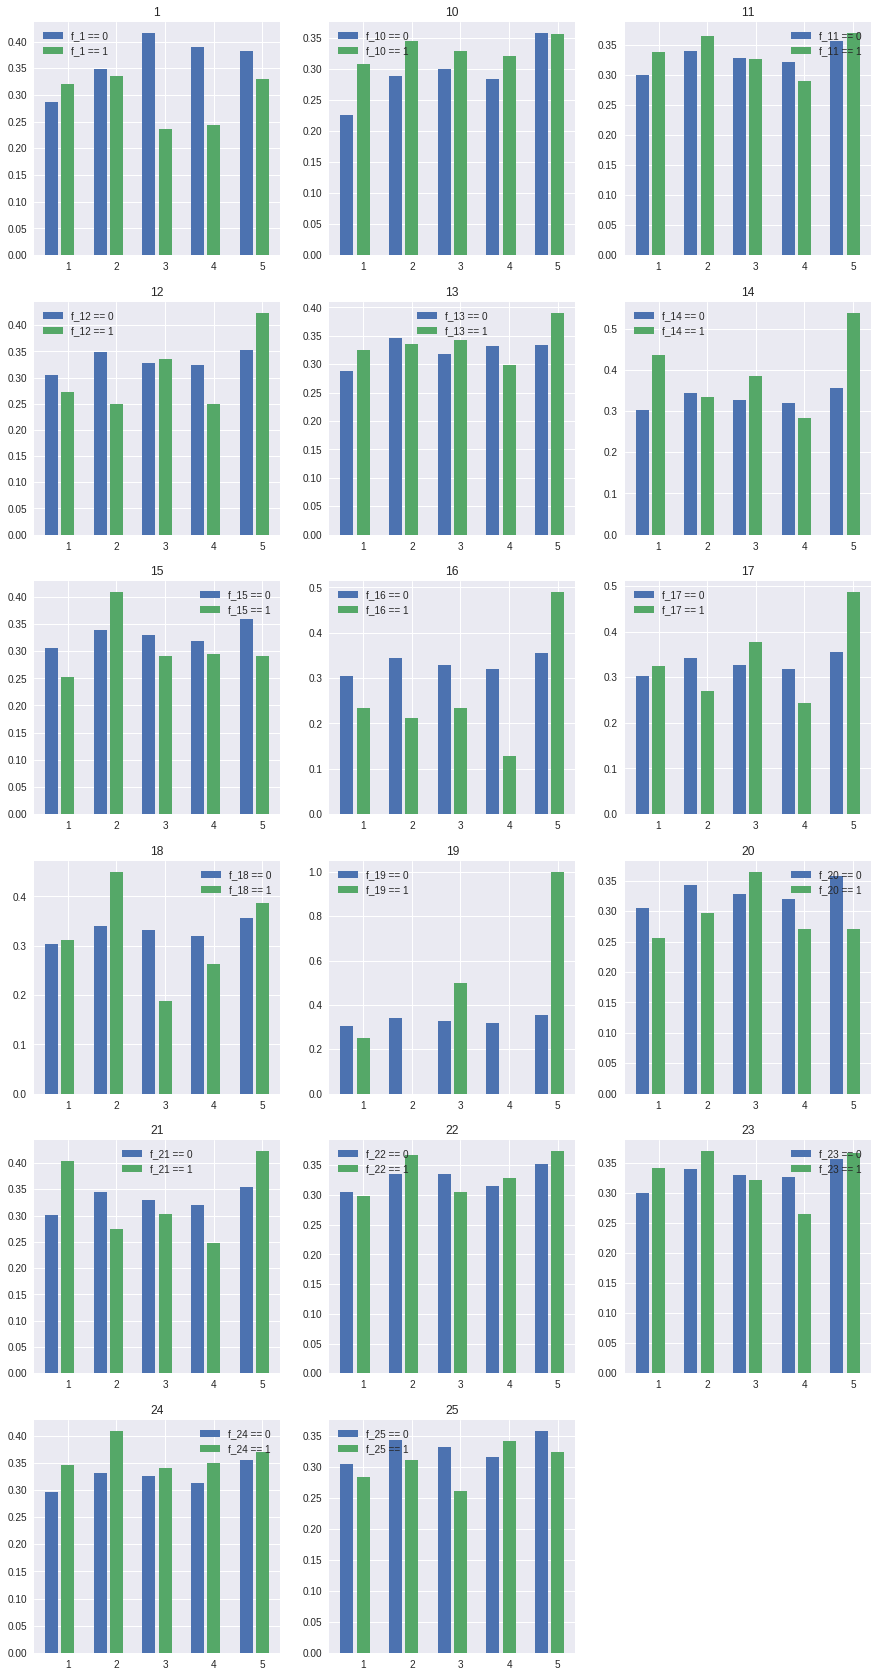

In [15]:
plt.figure(figsize=[15, 30])

x = 1.5 * np.arange(5)
d = 0.5
w = 0.4

for i, f in enumerate(binary_features):
    plt.subplot(6, 3, i + 1)
    idx = train_x1_df[f].astype(bool)
    neg = train_y_df[~idx].iloc[:, 1:].mean()
    pos = train_y_df[idx].iloc[:, 1:].mean()
    plt.bar(x, neg, width=w, tick_label=train_y_df.columns[1:], label="f_" + f + " == 0")
    plt.bar(x + d, pos, width=w, tick_label=train_y_df.columns[1:], label="f_" + f + " == 1")
    plt.title(f)
    plt.legend()

На этих графиках лучше видно, какие признаки коррелируют с целевыми переменными. Например признак 16 хорошо определяет 4-ый таргет

Найдем $\phi$ - coefficient (корелляция Пирсона между бинарными величинами)

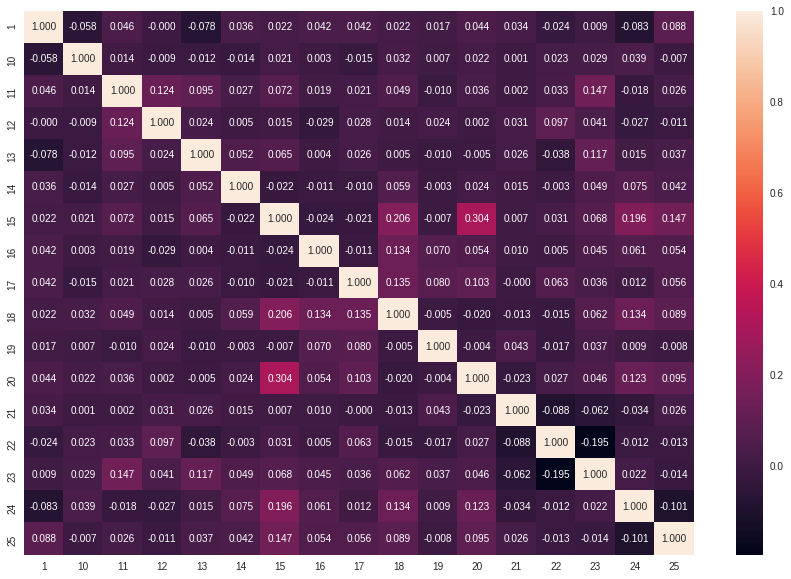

In [16]:
plt.figure(figsize=[15, 10])
c = train_x1_df[binary_features].corr()
sns.heatmap(c, annot=True, fmt=".3f")

Посмотрим на пару сильно скореллированных величин: 15 и 20

In [17]:
pd.crosstab(train_x1_df["15"], train_x1_df["20"], normalize=True)

20       0       1
15                
0   0.9445  0.0090
1   0.0370  0.0095

Похоже $\phi$ - coef не очень интерпретируемая величина. 

Построим следующие таблицы: выберем пару признаков и найдем энтропию распределения первого из них при условии второго. То есть две таблицы, так как два условия: либо второй признак равен 0, либо 1

Применить функцию corr не получается, так как та величина, что мы хотим найти, несимметрична, а corr похоже считает иначе, и для каждой пары признаков считает величину только один раз

In [18]:
def binary_conditional_entropy(x, y, condition):
    distr = pd.crosstab(x, y)
    distr = distr / distr.sum()
    return stats.entropy(distr[condition])

def bce_table(df, condition):
    entr = pd.DataFrame(index=df.columns, columns=df.columns)
    for f1 in df.columns:
        for f2 in df.columns:
            entr.loc[f1, f2] = binary_conditional_entropy(df[f1], df[f2], condition)
    return entr.astype(float)

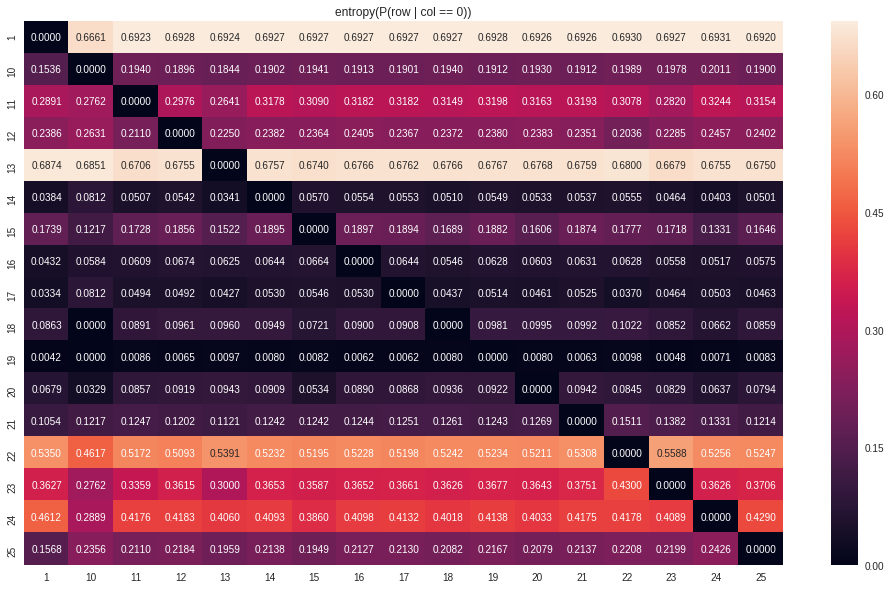

In [19]:
plt.figure(figsize=[17, 10])
c = bce_table(train_x1_df[binary_features], 0)
sns.heatmap(c, annot=True, fmt=".4f")
plt.title("entropy(P(row | col == 0))");

Есть вырожденные распределения, например посмотрим на пару 18,10. Но в целом чего-то интересного не заметно

In [20]:
pd.crosstab(train_x1_df["18"], train_x1_df["10"]) / pd.crosstab(train_x1_df["18"], train_x1_df["10"]).sum()

10    0         1
18               
0   1.0  0.979003
1   0.0  0.020997

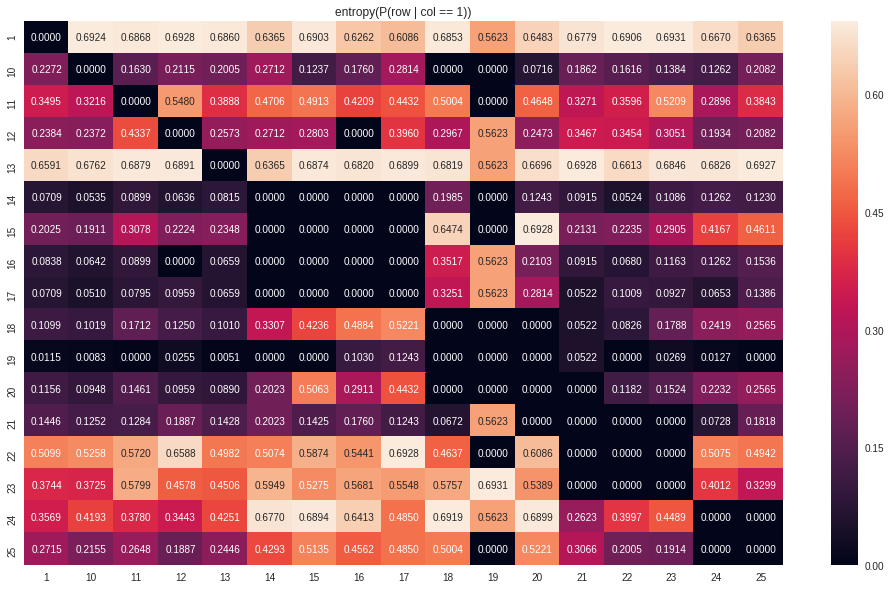

In [21]:
plt.figure(figsize=[17, 10])
c = bce_table(train_x1_df[binary_features], 1)
sns.heatmap(c, annot=True, fmt=".4f")
plt.title("entropy(P(row | col == 1))");

Бросаются в глаза блоки пар признаков таких что оба распределения P(f1|f2) и P(f2|f1) вырождены. Это признаки: 14-17, 18-20, 21-23, 24-25, 12 и 16, 14 и 19, 15 и 19, 19 и 22, 19 и 25, 20 и 21

Пары признаков, включающие 19, скорее случайны, так как 19 очень слабо представлен в данных. Тем не меннее этот признак мы не будем пока исключать из рассмотрения

Посмотрим на уникальные комбинации значений этих групп признаков

In [22]:
set(tuple(x) for x in train_x1_df[["14", "15", "16", "17"]].values)

{(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)}

In [23]:
set(tuple(x) for x in train_x1_df[["18", "19", "20"]].values)

{(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0)}

In [24]:
set(tuple(x) for x in train_x1_df[["21", "22", "23"]].values)

{(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0)}

In [25]:
set(tuple(x) for x in train_x1_df[["24", "25"]].values)

{(0, 0), (0, 1), (1, 0)}

In [26]:
set(tuple(x) for x in train_x1_df[["12", "16"]].values)

{(0, 0), (0, 1), (1, 0)}

In [27]:
set(tuple(x) for x in train_x1_df[["20", "21"]].values)

{(0, 0), (0, 1), (1, 0)}

И пары с 19-ым

In [28]:
set(tuple(x) for x in train_x1_df[["19", "14"]].values)

{(0, 0), (0, 1), (1, 0)}

In [29]:
set(tuple(x) for x in train_x1_df[["19", "15"]].values)

{(0, 0), (0, 1), (1, 0)}

In [30]:
set(tuple(x) for x in train_x1_df[["19", "22"]].values)

{(0, 0), (0, 1), (1, 0)}

In [31]:
set(tuple(x) for x in train_x1_df[["19", "25"]].values)

{(0, 0), (0, 1), (1, 0)}

Выглядит так, будто некоторые наборы признаков это dummy encoding некоторой категориальной переменной. Для деревянных моделей, возможно, лучше будет перекодировать эти наборы в категории, ибо, как привило, они страдают от большого количества признаков. Либо это просто взаимно-исключающие признаки, то есть внутри группы либо не выражен ни один, либо строго один

Видим, что в первой группе 5 возможных комбинаций, в точности столько же, сколько значений признаков 2 и 3. Проверим, являются ли они скоррелированными:

In [32]:
len(set(tuple(x) for x in train_x1_df[["14", "15", "16", "17", "2"]].values))

24

In [33]:
len(set(tuple(x) for x in train_x1_df[["14", "15", "16", "17", "3"]].values))

24

Видим, что число комбинаций значительно больше 5. Гипотеза не подтвердилась

На этом закончим рассмотрение бинарных переменных, перейдем к категориальным

## Категориальные/порядковые

In [34]:
categorical_features = ["2", "3"]

In [35]:
train_x1_df[categorical_features].head()

2    3
0 -1.0 -1.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0

Посмотрим на распределение значений, графики приведем в логарифмическом масштабе, так как значение 0 для обоих признаков представлено на порядок чаще остальных.

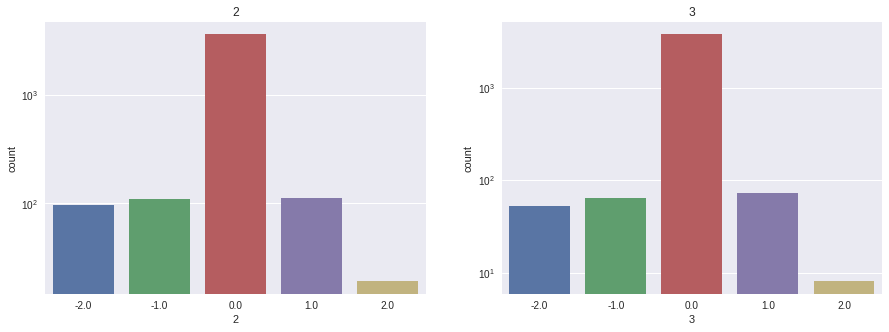

In [36]:
plt.figure(figsize=[15, 5])

for i, f in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(train_x1_df[f])
    plt.yscale("log")
    plt.title(f)

In [37]:
(train_x1_df["2"] == 0).sum(), (train_x1_df["3"] == 0).sum()

(3662, 3803)

In [38]:
(train_x1_df["2"] == 2).sum(), (train_x1_df["3"] == 2).sum()

(19, 8)

Большая часть значений обоих признаков - 0 (3600-3800 значений), реже всего встречется 2 (10-20 значений), остальные порядка 100

Посмотрим на совместное и условные распределения

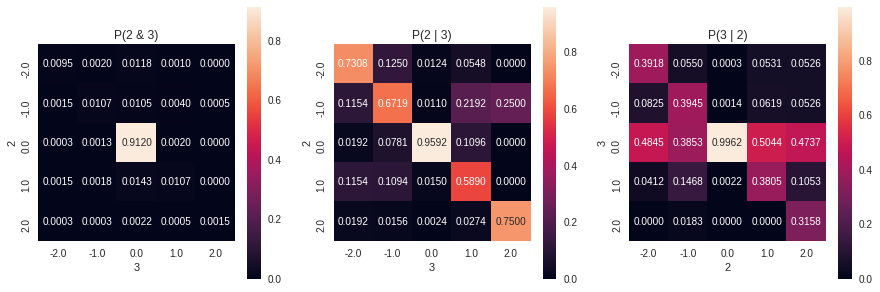

In [39]:
ct = pd.crosstab(train_x1_df["2"], train_x1_df["3"], normalize=True)
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.title("P(2 & 3)")
sns.heatmap(ct, annot=True, fmt=".4f", square=True)

plt.subplot(1, 3, 2)
plt.title("P(2 | 3)")
sns.heatmap(ct / ct.sum(), annot=True, fmt=".4f", square=True)

plt.subplot(1, 3, 3)
plt.title("P(3 | 2)")
sns.heatmap(ct.T / ct.T.sum(), annot=True, fmt=".4f", square=True)

Видим, что по '3' можно предсказать '2'. По '2' лучший ответ для '3' - 0, кроме случая '2' = -1. Другими словами зависимость '2' от '3' выражена сильнее, чем обратная

Построим pivot table средних значений таргетов, сгруппированных по значениям категориальных признаков

Text(0.5, 1, '3')

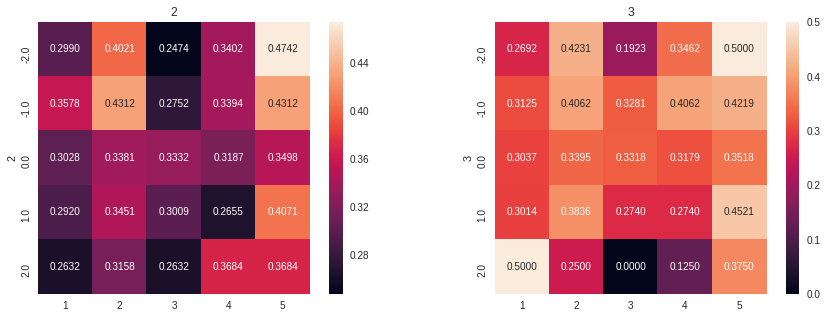

In [40]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
pt = pd.pivot_table(train_y_df, index=train_x1_df["2"], values=["1", "2", "3", "4", "5"], aggfunc=np.mean)
sns.heatmap(pt, annot=True, fmt=".4f", square=True)
plt.title("2")

plt.subplot(1, 2, 2)
pt = pd.pivot_table(train_y_df, index=train_x1_df["3"], values=["1", "2", "3", "4", "5"], aggfunc=np.mean)
sns.heatmap(pt, annot=True, fmt=".4f", square=True)
plt.title("3")

В целом, есть корреляция между категориальными переменными и целевыми.

Перейдем к вещественным переменным

## Числовые

In [41]:
numeric_features = list(map(str, range(4, 10)))

In [42]:
train_x1_df[numeric_features].head()

4      5       6     7      8     9
0  107.0  255.0   537.0  10.0   41.0   0.0
1   20.0    0.0   188.0   1.0   25.0   2.0
2  158.0  155.0  3092.0   3.0  218.0  29.0
3  102.0  343.0   341.0   0.0   24.0   2.0
4    1.0    1.0    33.0   0.0   41.0   1.0

Посмотрим на корреляции признаков

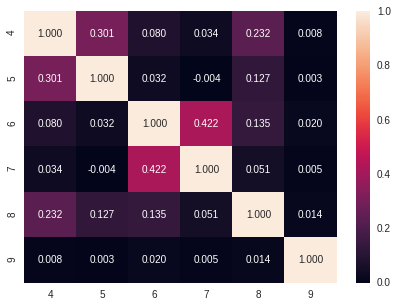

In [43]:
plt.figure(figsize=[7, 5])
c = train_x1_df[numeric_features].corr()
sns.heatmap(c, annot=True, fmt=".3f")

и на попарные расределения

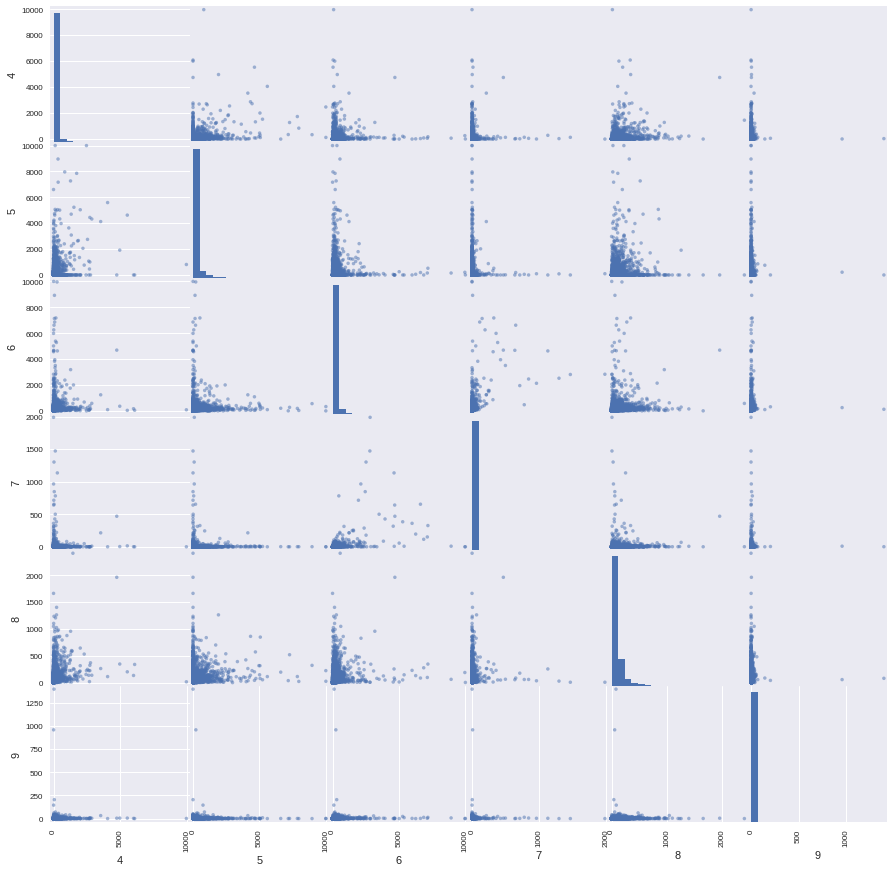

In [44]:
pd.plotting.scatter_matrix(train_x1_df[numeric_features], figsize=[15, 15], 
                           hist_kwds=dict(bins=20))
None

видим, распределения сильно скошены в сторону нуля, попробуем прологарифмировать сами признаки

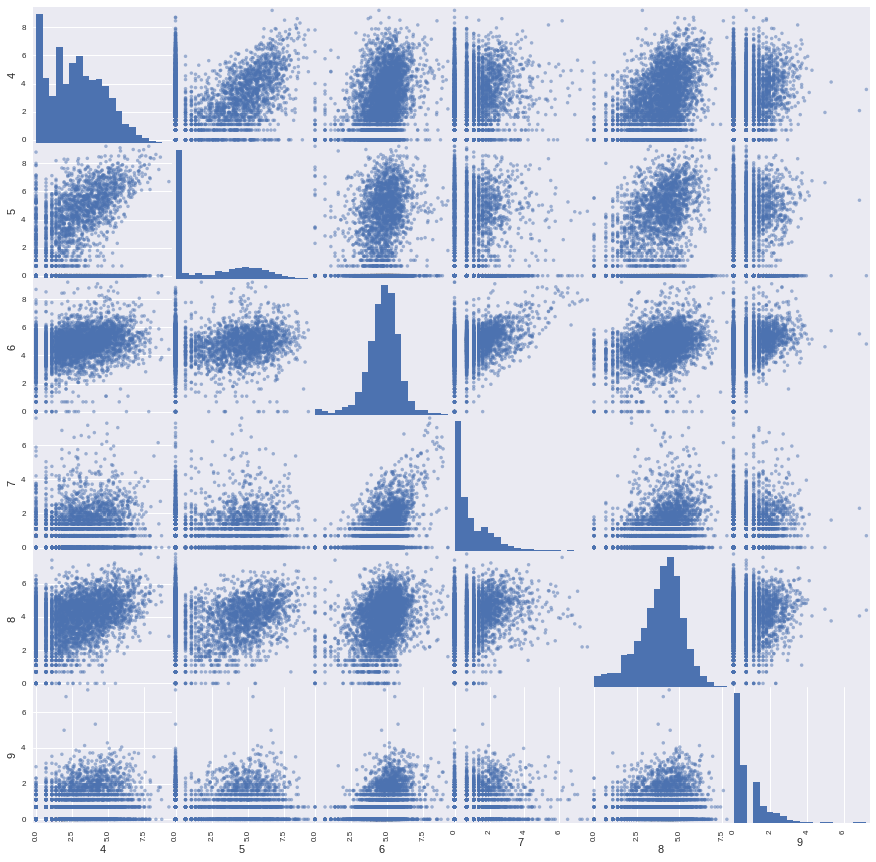

In [45]:
pd.plotting.scatter_matrix(np.log1p(train_x1_df[numeric_features]), figsize=[15, 15], 
                           hist_kwds=dict(bins=20))
None

Так лучше. У признаков 4, 5, 7, 9 много нулевых значений. 6 и 8 приняли колоколообразную форму. Посмотрим ближе на распределение 6-7

Text(0, 0.5, '7')

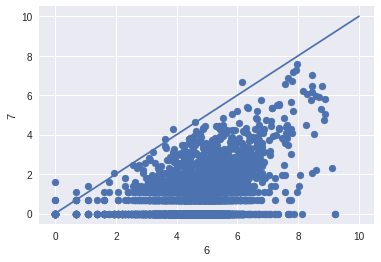

In [46]:
plt.scatter(np.log1p(train_x1_df["6"]), np.log1p(train_x1_df["7"]))
plt.plot([0, 10], [0, 10])
plt.xlabel("6"); plt.ylabel("7")

In [47]:
(train_x1_df["6"] < train_x1_df["7"]).sum()

10

Выглядит так, словно 6 мажорирует 7. Только для 10 примеров это условие нарушается

Посмотрим ближе на распределение для 5, оно похоже на смесь константы и чего-то колоколообразного, при этом исключим значения равные 0

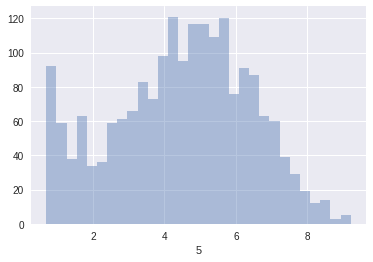

In [48]:
sns.distplot(np.log1p(train_x1_df["5"][train_x1_df["5"] > 0]), kde=False, bins=30)

все равно остается тяжелый левый хвост. похоже что первое распределение смеси не совсем константа

построим boxplot'ы для распределений признаков, в зависимости от таргета. Графики в одной строке соответствуют одному признаку. график в строке соответствуем конкретному таргету и показывает распределение соотвветствующего признака при условии равенства таргета 0 или 1

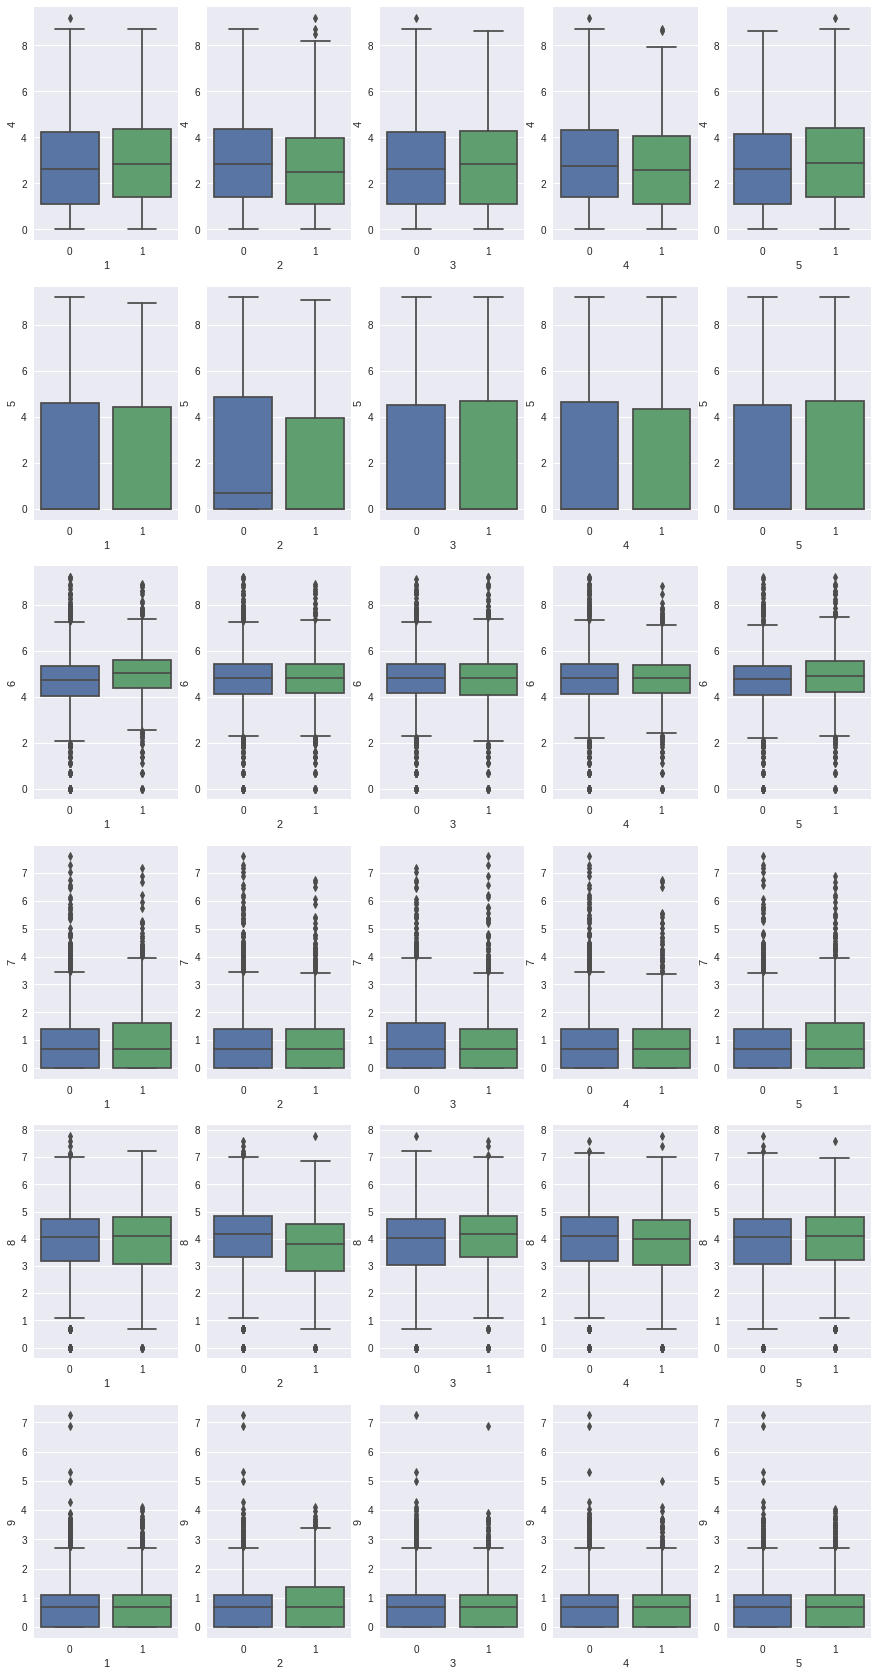

In [49]:
plt.figure(figsize=[15, 30])
for i, feature in enumerate(numeric_features):
    for j, target in enumerate(["1", "2", "3", "4", "5"]):
        plt.subplot(len(numeric_features), 5, i * 5 + j + 1)
        sns.boxplot(train_y_df[target], np.log1p(train_x1_df[feature]))

Значимых отличий не видно для значений таргета 0 и 1 не заметно

В целом, по этим графикам можно отфильтровать выбросы, объявив все вне интерквартильного размаха выбросом, но это слишком грубо. Правило трех сигм хорошо сработает если удастся принять гипотезу нормальности, что даже по внешнему виду распределений, даже после логарифмирования не так. Можно попробовать подобрать преобразование Бокса-Кокса и, возможно, получить что-то более похожее на нормальное распределение.

В то же время визуально видно, что можно посчитать выбросом. Смотрим на признак 9, все что больше 4.5 (в логарифмической шкале) уже сильно отстает от основной массы. Как вариант объявить их выбросами. Посмотрим на таргет таких объектов

In [50]:
train_y_df[np.log1p(train_x1_df["9"]) > 4.5]

id  1  2  3  4  5
612   1307  0  0  0  0  0
1139  2376  0  0  0  1  0
1888  3827  0  0  1  0  0
3407  6876  0  0  0  0  0

In [51]:
def mask_outliers_x1_9(x1_df):
    return np.log1p(x1_df["9"]) > 4.5

# X2

Посмотрим на сами данные

In [52]:
train_x2_df.head()

id      A
0   3      5
1   3  70340
2   3  72868
3   3  73471
4   3  74998

In [53]:
train_x2_df.shape

(462888, 2)

In [54]:
train_x2_df["id"].nunique()

4000

In [55]:
train_x2_df["A"].nunique()

134369

это похоже на разреженную матрицу признаков, которых здесь 134369 штук. Посмотрим на количество раз, которое каждый признак встречается

In [56]:
vc = train_x2_df["A"].value_counts()

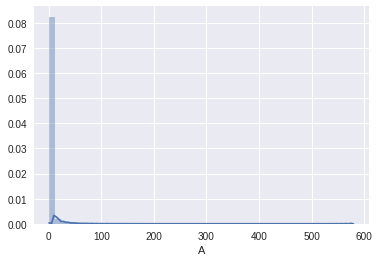

In [57]:
sns.distplot(vc)

По всей видимости, большая часть признаков встречалась только 1 раз

In [58]:
(vc > 1).mean()

0.31207346932700253

Только треть признаков встретилась хотя бы два раза

In [59]:
vc.value_counts()[:20]

1     92436
2     15762
3      6620
4      3782
5      2584
6      1775
7      1356
8      1037
9       881
10      727
11      610
12      508
13      445
14      397
15      354
16      311
17      283
18      253
19      251
20      207
Name: A, dtype: int64

Такие признаки можно не боясь удалять. Есть подозрение, что эти признаки - суть веб ресурсы, которые посетил пользователь, к сожалению организоторы не предоставили расшифровку признаков. Один раз - случайность, два - совпадение, три - закономерность. Да и к переобучению такая ситуация приведет сразу.

In [60]:
def get_frequent_features_x2(x2_df, k=1):
    vc = train_x2_df["A"].value_counts()
    return list(vc.index[vc > k])

In [61]:
len(get_frequent_features_x2(train_x2_df))

41933

In [62]:
len(get_frequent_features_x2(train_x2_df, 2))

26171

Хотя возможно, что для конкретного объекта порядок, в котором перечислены эти признаки, имеет значение. То есть для каждого объекта дана последовательность. Посмотрим, какие длины этой последовательности бывают

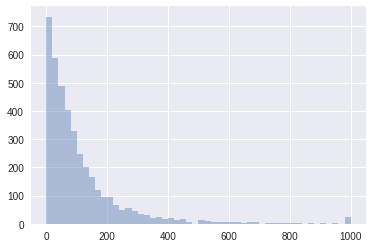

In [63]:
lens = pd.pivot_table(train_x2_df, index="id", aggfunc=lambda x: len(x))
sns.distplot(lens, kde=False)

Наличие строгого пика на границе диапазона, который к тому же имеет круглое значение, может говорить о том, что признак был предобработан, а именно все значения большие 1000 были заменены на 1000.

Если признаки представляют собой последовательности, то это значит, что оставляются только 1000 последние просмотренных ресурсов; если не последовательности, то, вообще говоря, не очевидно, какие признаки оставлять.

То же самое, только для логарифма этой величины

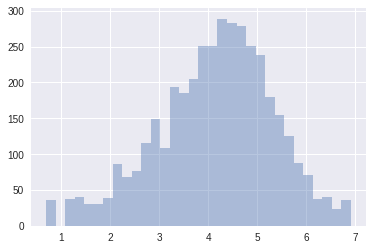

In [64]:
sns.distplot(np.log1p(lens), kde=False)

In [65]:
lens.values.min(), lens.values.max()

(1, 1000)

In [66]:
(lens["A"] == 1).sum(), (lens["A"] == 1000).sum()

(36, 20)

то есть для каждого объекта на более 1000 записей. Но достаточно много записей с одним признаком

Если это последовательности веб-ресурсов, то, скорее всего один признак может повториться несколько раз, проверим это

In [67]:
train_x2_df.groupby("id").apply(lambda x: x["A"].value_counts().max()).max()

1

Как видим, ни для какого пользователя среди его признаков ни одно значение не повторяется, скорее всего это не последовательности, а просто идентификаторы посещенных ресурсов. Тогда как сделать clip к 1000 значений? Есть подозрение, что оставляются 1000 наиболее типичных ресурсов для данного пользователя, это логично

При такой интерпретации, пользователи, для которых всего один признак либо посещают только один ресурс (скажем бабушка только проверяет почту), либо новые пользователи, для которых пока не накоплена история. Во втором крайнем случае их можно считать выбросами и удалить. Но не удаляя, можно дать возможность модели самой подстроиться под них

In [68]:
def get_frequent_users_x2(x2_df, k=1):
    mask = x2_df.groupby("id").apply(lambda x: x["A"].nunique() > k)
    return list(mask.index[mask])

In [69]:
len(get_frequent_users_x2(train_x2_df))

3964

In [70]:
len(get_frequent_users_x2(train_x2_df, k=2))

3927

## X3

Первый взгляд

In [71]:
train_x3_df.head()

id    1    2     3    4         5         6    7    8    9   10   11   12  \
0   3  0.0  0.0  0.00  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
1   5  0.0  0.0  0.00  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
2   6  0.0  0.0  0.00  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
3   8  0.0  0.0  0.02  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
4  10  0.0  0.0  0.00  0.0  0.055556  0.055556  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16   17   18   19   20        21   22   23   24   25    26  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.022222  0.0  0.0  0.0  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.00   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.00   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.02   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.00   

    27   28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    42   43   44   45   46   47   48   49   50   51    52   53   54   55   56  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.02  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   

    57   58   59   60   61   62   63    64        65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.019802  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.02  0.000000  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0   

    71   72    73   74   75   76   77   78   79   80   81   82        83   84  \
0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3  0.0  0.0  0.02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
4  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.055556  0.0   

    85    86   87   88   89   90        91   92   93   94   95   96   97   98  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.022222  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.00  0.0  0.0  0.0  0.0  0.029703  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.00  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.02  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.00  0.0  0.0  0.0  0.0  0.222222  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    99  100  101  102  103  104  105  106       107       108  109  110  111  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.111111  0.111111  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.009901  0.019802  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.040000  0.000000  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0   

        112  113  114   115       116  117  118  119  120   121  122  123  \
0  0.000000  0.0  0.0  0.00  0.000000  0.0  0.0 

In [72]:
train_x3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 453 entries, id to 452
dtypes: float64(452), int64(1)
memory usage: 13.8 MB


In [73]:
d = train_x3_df.describe()
d

id            1            2            3            4  \
count  4000.00000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   4060.31125     0.000359     0.000726     0.003990     0.000045   
std    2310.14735     0.003333     0.009127     0.015324     0.000891   
min       3.00000     0.000000     0.000000     0.000000     0.000000   
25%    2077.75000     0.000000     0.000000     0.000000     0.000000   
50%    4066.00000     0.000000     0.000000     0.000000     0.000000   
75%    6073.25000     0.000000     0.000000     0.000000     0.000000   
max    8056.00000     0.115385     0.500000     0.333333     0.033333   

                 5            6            7            8            9  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.007936     0.019148     0.000084     0.000158     0.000678   
std       0.025807     0.043086     0.001125     0.001760     0.008510   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.018224     0.000000     0.000000     0.000000   
max       0.500000     0.500000     0.035714     0.066667     0.333333   

                10           11           12           13           14  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.000812     0.000084     0.000003     0.002663     0.000161   
std       0.007488     0.001306     0.000168     0.012968     0.002279   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.333333     0.045455     0.010638     0.300000     0.105263   

                15           16           17           18           19  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.000124     0.002841     0.000011     0.000052     0.000202   
std       0.002032     0.010473     0.000336     0.001251     0.001852   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.090909     0.200000     0.015385     0.055556     0.043478   

                20           21           22      23           24  \
count  4000.000000  4000.000000  4000.000000  4000.0  4000.000000   
mean      0.000485     0.003584     0.000015     0.0     0.000139   
std       0.003218     0.012871     0.000406     0.0     0.002369   
min       0.000000     0.000000     0.000000     0.0     0.000000   
25%       0.000000     0.000000     0.000000     0.0     0.000000   
50%       0.000000     0.000000     0.000000     0.0     0.000000   
75%       0.000000     0.000000     0.000000     0.0     0.000000   
max       0.090909     0.357143     0.017241     0.0     0.111111   

                25           26           27           28           29  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.000170     0.000129     0.014117     0.000006     0.000017   
std       0.003225     0.001695     0.034350     0.000268     0.000452   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.015625     0.000000     0.000000   
max       0.142857     0.076923     1.000000     0.015385     0.018868   

                30           31           32           33          

In [74]:
d.loc["min", "1":].min(), d.loc["max", "1":].max()

(0.0, 1.0)

Эти признаки все в диапазоне от 0 до 1

In [75]:
d.loc["min", "1":].max()

0.0

при этом минимальное значение у всех ноль, максимальные отличются, но не превышают 1

In [76]:
d.columns[1:][d.loc["std", "1":] == 0]

Index(['23', '266', '410', '426'], dtype='object')

Четыре признака константные (нулевые), их нужно будет исключить

In [77]:
(d.loc["25%", "1":] > 0).sum()

1

Только один признак (448) имеет весьма разнообразные значения, остальные больше чем в 75% случаев нулевые

In [78]:
c = train_x3_df.corr()

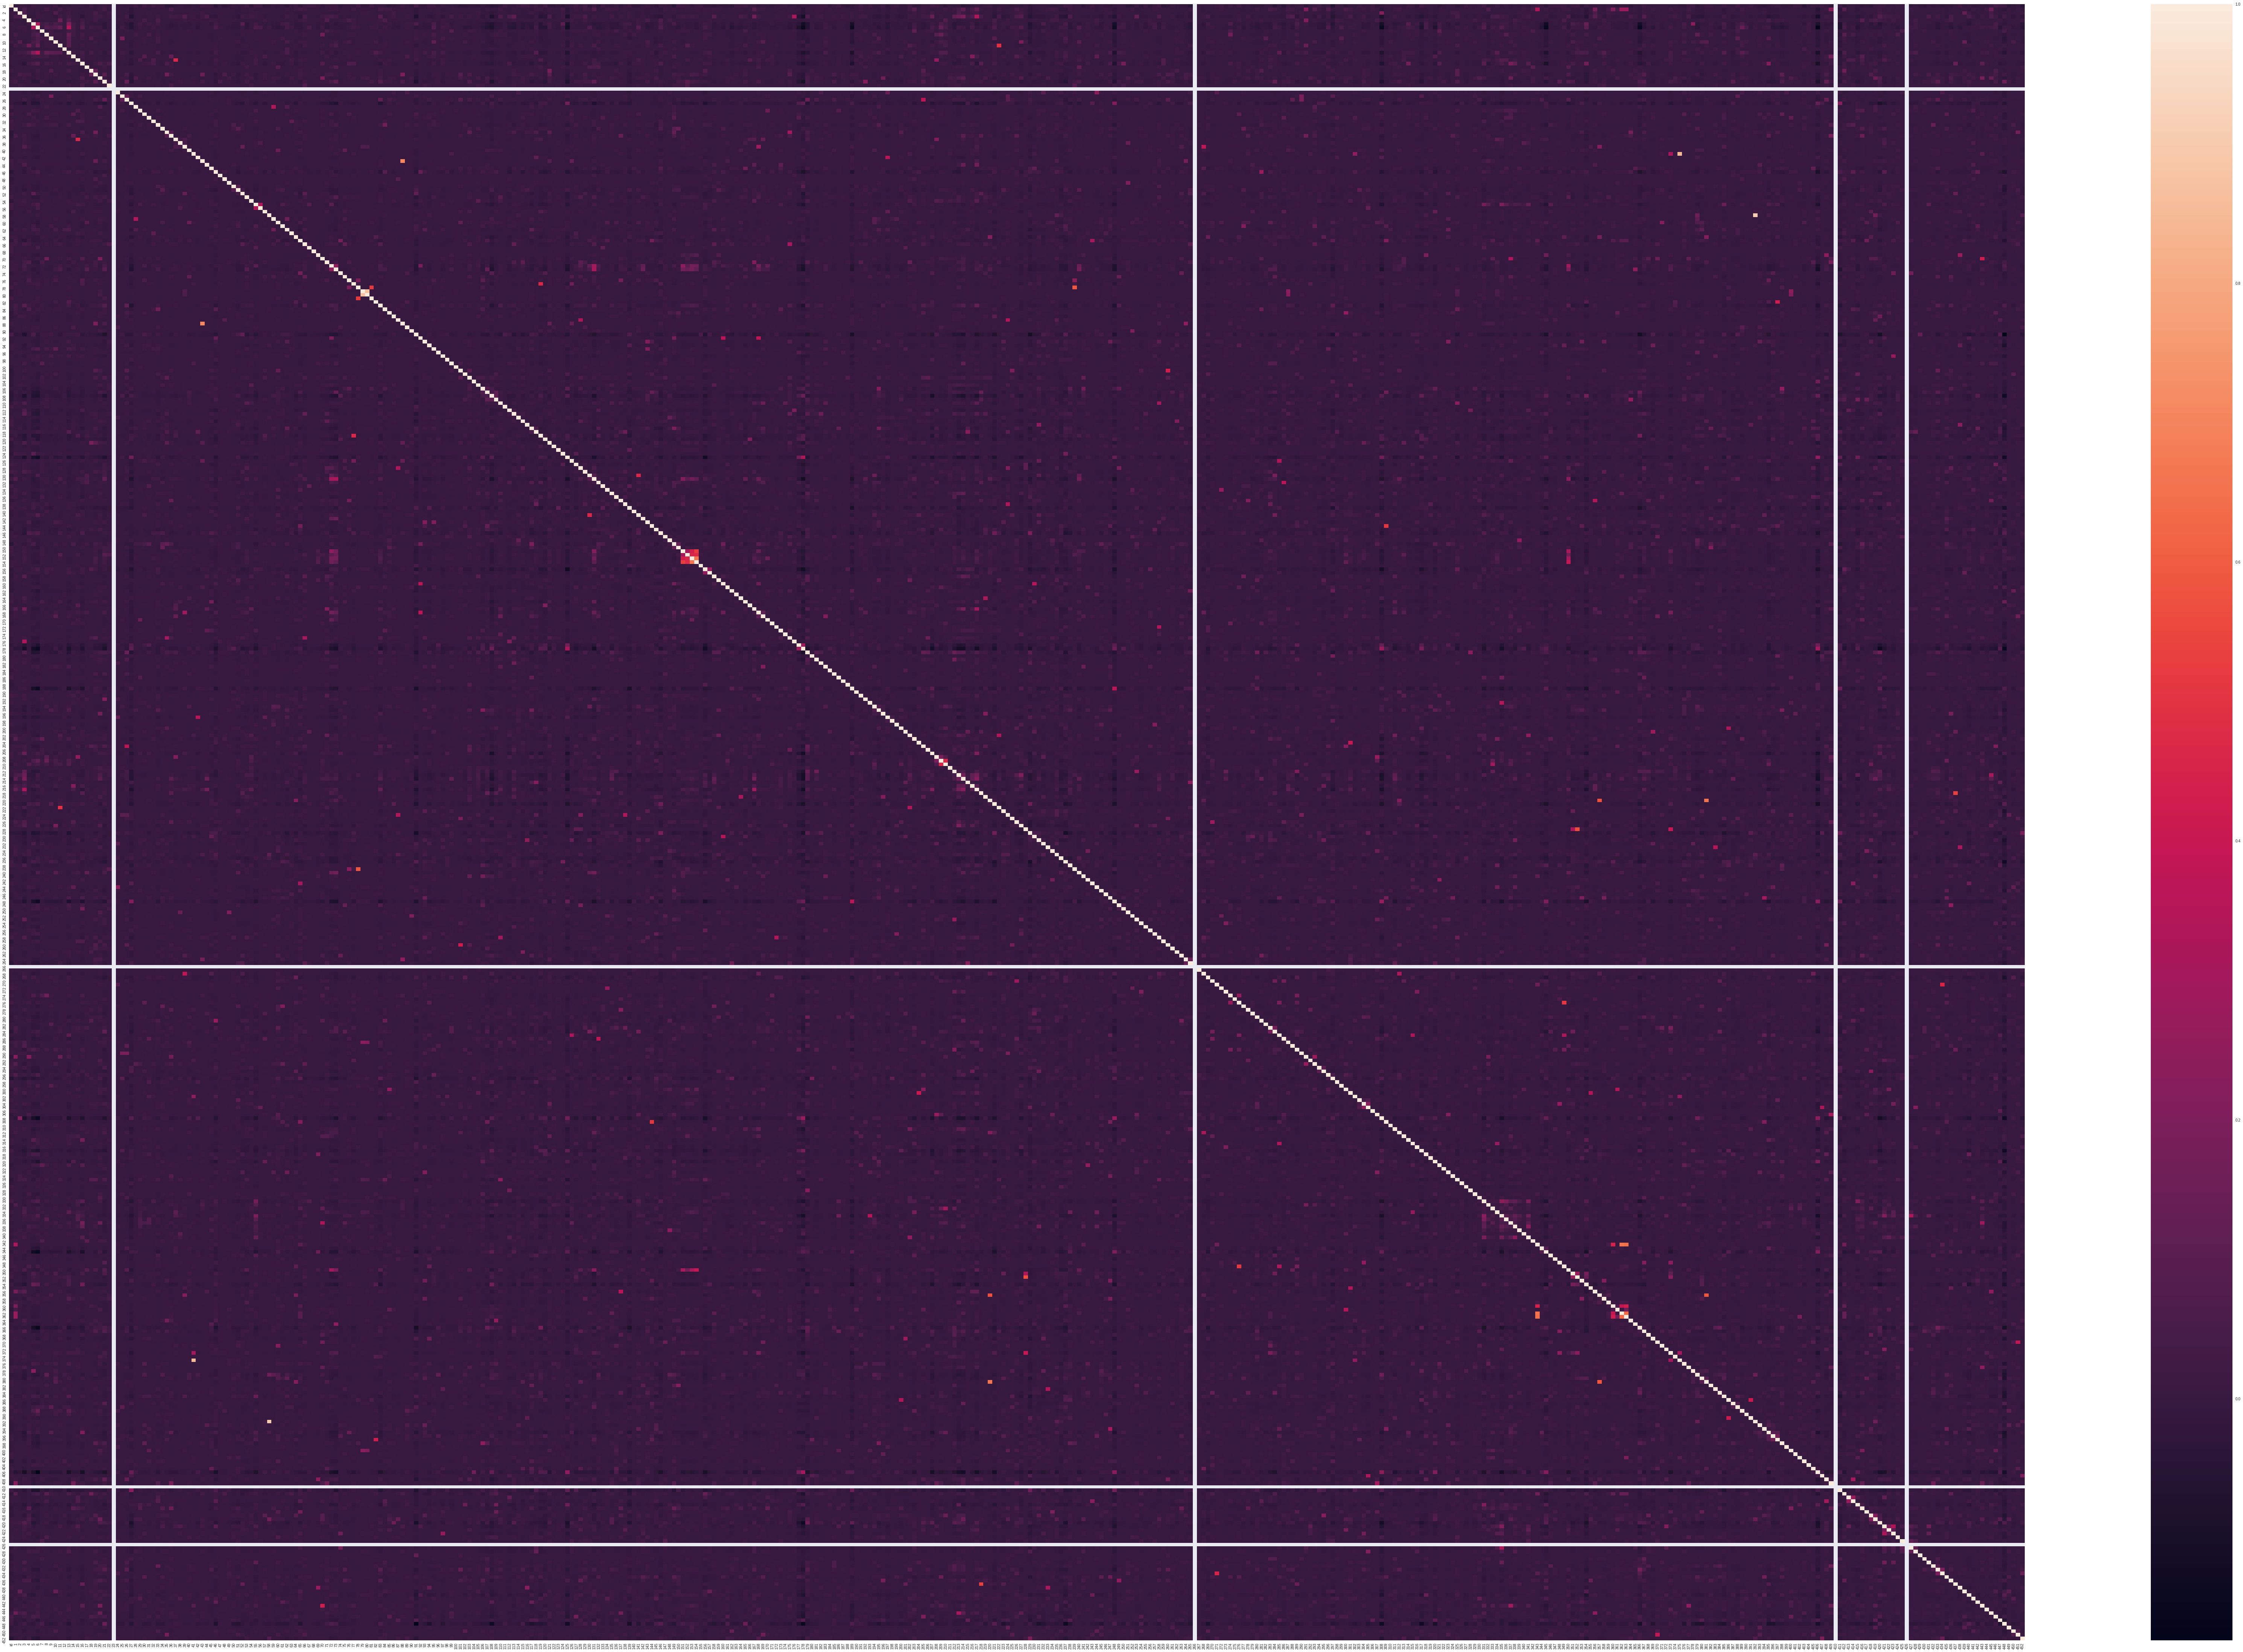

In [79]:
plt.figure(figsize=[120, 80])
sns.heatmap(c)

Белые полоски соответствуют константным признакам, там корелляция - nan:

Посмотрим, какие пары признаков дают наибольшие(положительные и отрицательные) корелляции

In [80]:
idx = np.triu_indices(453, 1)
corrs = c.fillna(0).values[idx]
idx = sorted((corrs[i], idx[0][i], idx[1][i]) for i in range(len(idx[0])))

In [81]:
idx[:10]

[(-0.1732493712601048, 91, 448),
 (-0.16999984236543056, 6, 406),
 (-0.14882805730364967, 6, 345),
 (-0.14863748660774662, 178, 448),
 (-0.14522173170958957, 6, 178),
 (-0.14250939525731768, 6, 366),
 (-0.13712762729864444, 6, 308),
 (-0.13436339663797975, 178, 420),
 (-0.1323918938341743, 6, 189),
 (-0.13037167734767288, 108, 448)]

Отрицательные корелляции не очень большие по абсолютной величине

In [82]:
idx[-20:]

[(0.47571257635582104, 152, 154),
 (0.4926237230933104, 11, 222),
 (0.5070525207166943, 144, 309),
 (0.5133304321341955, 276, 349),
 (0.5172047434550667, 78, 81),
 (0.5254404887273115, 151, 154),
 (0.5327146251712475, 218, 437),
 (0.565791793404717, 228, 352),
 (0.571182190325652, 220, 357),
 (0.5845827367854692, 357, 381),
 (0.5910436727485406, 78, 239),
 (0.6330137964676184, 362, 363),
 (0.645731789366868, 343, 363),
 (0.6532111879222702, 343, 362),
 (0.6602102900727116, 220, 381),
 (0.6611893816425759, 153, 154),
 (0.7110953354483646, 43, 88),
 (0.8515214012722592, 41, 375),
 (0.8748418884654607, 79, 80),
 (0.9057587554032567, 58, 392)]

Посмотрим на наиболее скоррелированные признаки

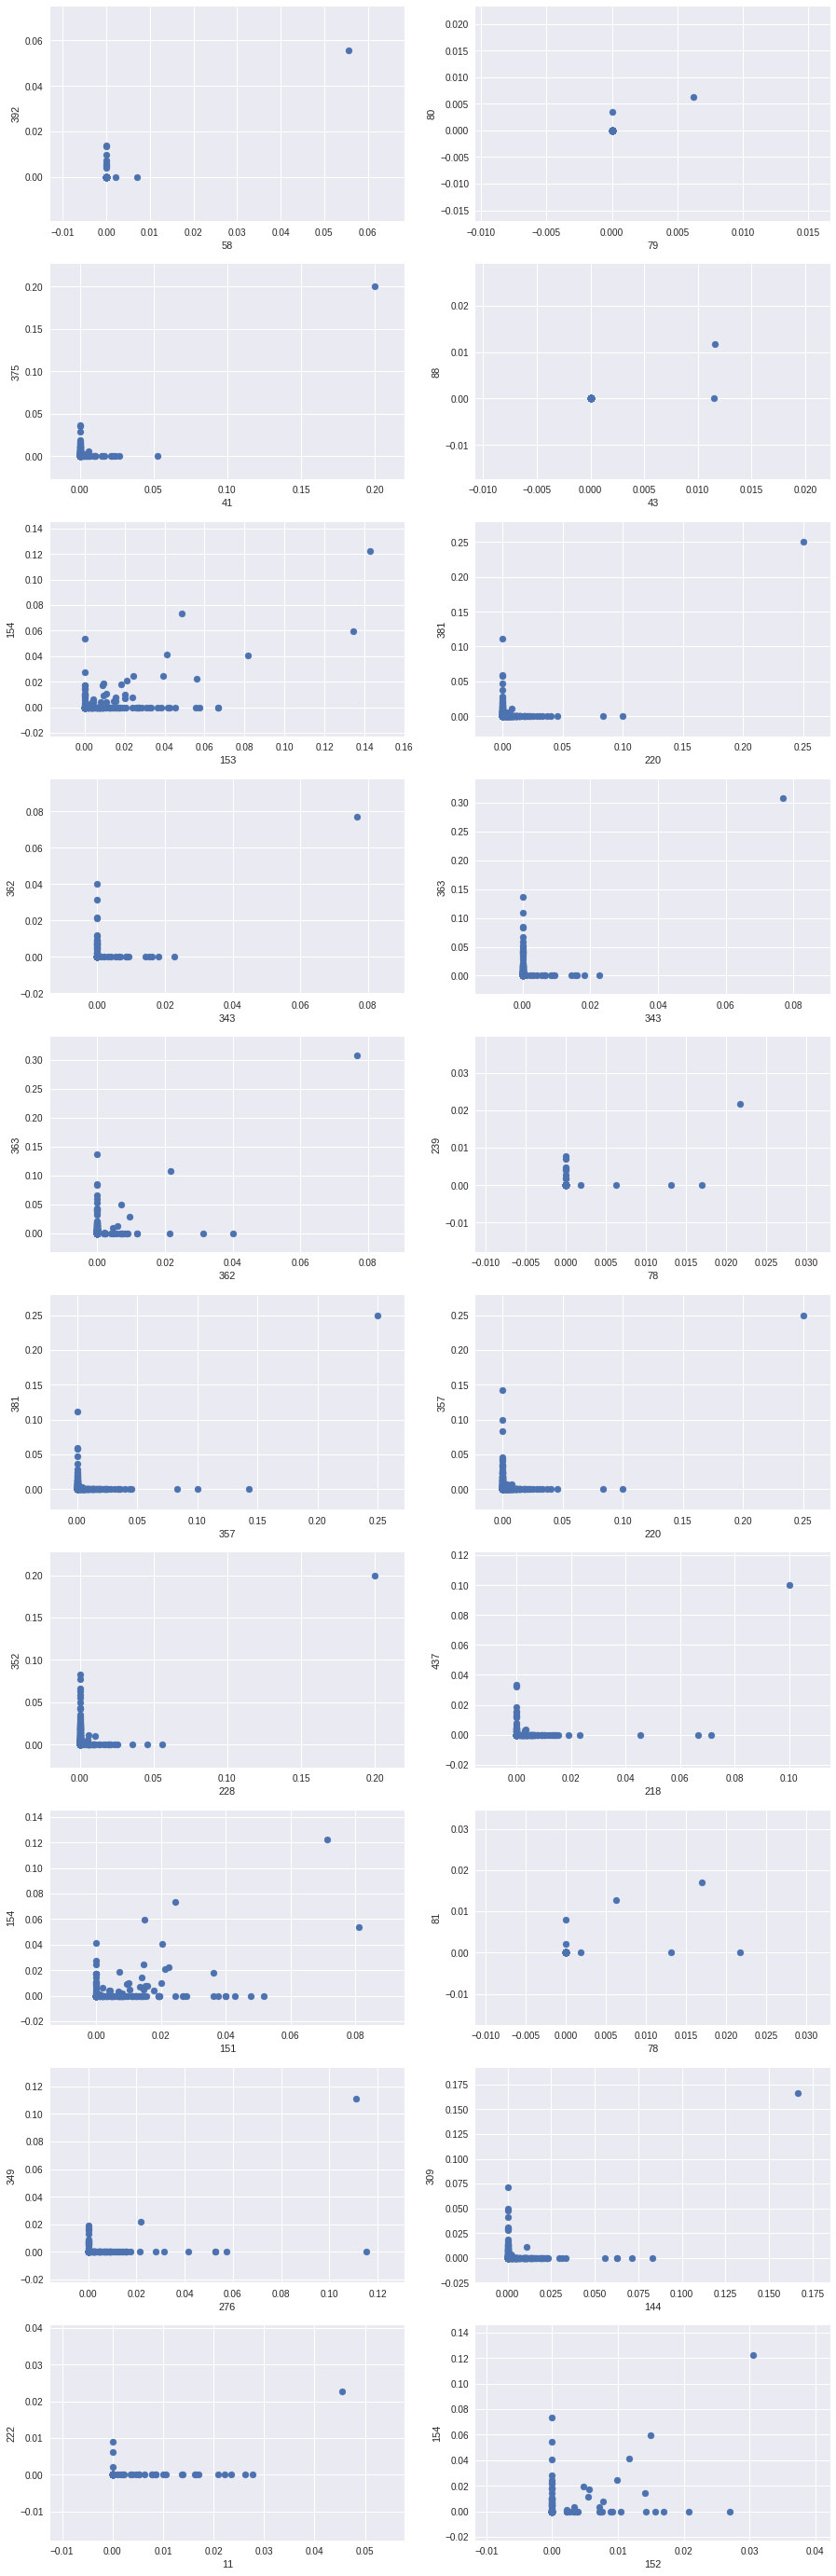

In [83]:
plt.figure(figsize=[15, 50])
for i, (_, x, y) in enumerate(reversed(idx[-20:])):
    plt.subplot(10, 2, i + 1)
    plt.scatter(train_x3_df[str(x)], train_x3_df[str(y)])
    plt.xlabel(str(x))
    plt.ylabel(str(y))

Видим, что высокая корреляция обуcловлена выбросами в данных. Например для пары 239-78 вообще не характерно наличие обоих ненулевых характеристик, но для одного объекта наблюдаются экстремальные значения по обоим признакам.

Посмотрим, сколько объектов имеют экстремальное значение признака в нескольких признаках одновременно.

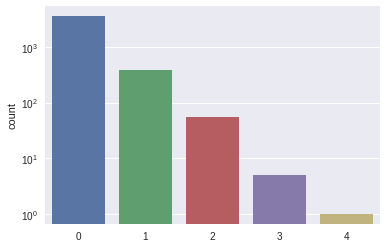

In [84]:
m = train_x3_df.apply(lambda x: np.max(x) if np.std(x) > 0 else 2)
m["id"] = 10000
sns.countplot((train_x3_df >= m).sum(axis=1))
plt.yscale("log")

In [85]:
((train_x3_df >= m).sum(axis=1) >= 2).sum()

61

Попробуем отфильтровать выбросы

In [86]:
def mask_outliers_x3(x3_df):
    m = x3_df.apply(lambda x: np.percentile(x, 99.9) * 3 if np.std(x) > 0 else 2)
    m["id"] = 10000
    return (x3_df > m).sum(axis=1) >= 1

In [87]:
mask_outliers_x3(train_x3_df).sum()

306

Построим попарные распределения еще раз

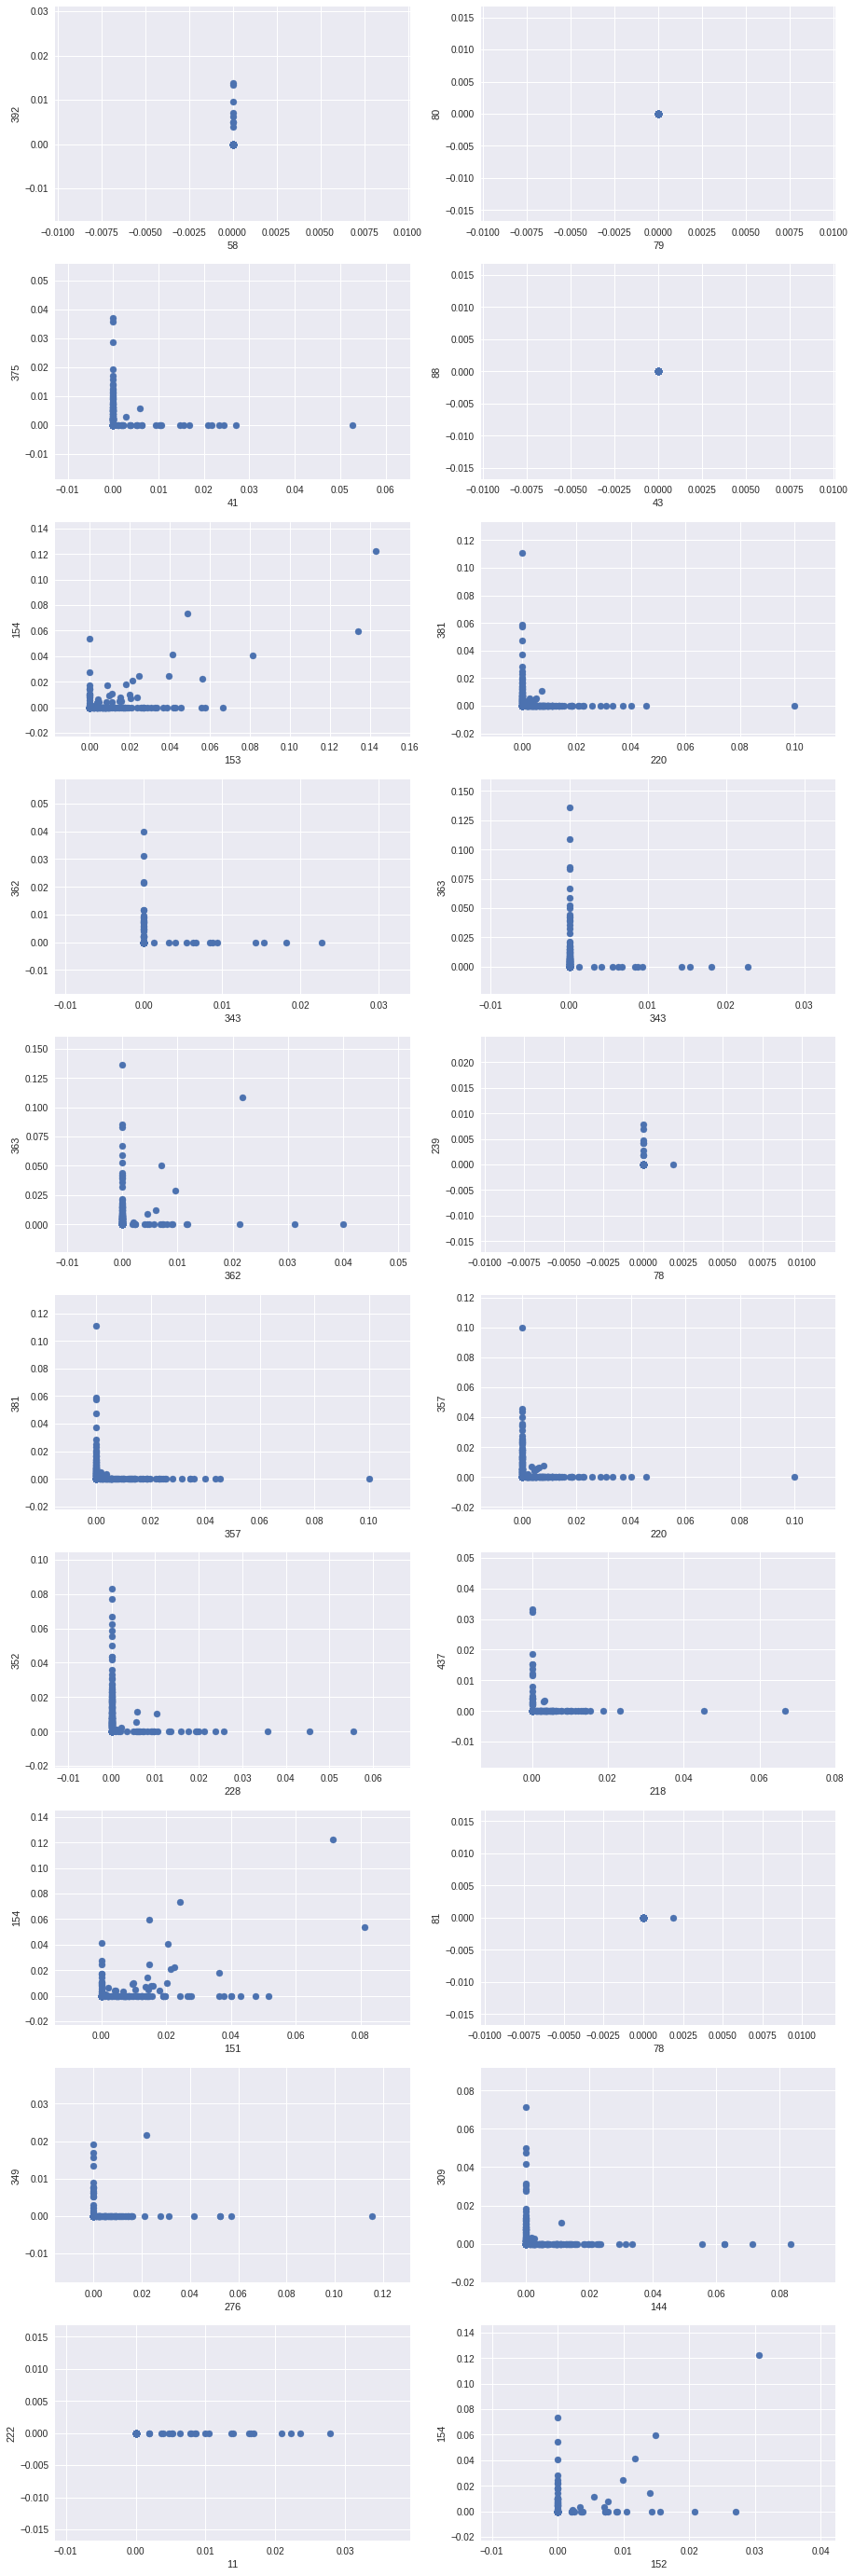

In [89]:
x3_df = train_x3_df.copy()

m = mask_outliers_x3(x3_df)

c = x3_df.corr()
idx = np.triu_indices(453, 1)
corrs = c.fillna(0).values[idx]
idx = sorted((corrs[i], idx[0][i], idx[1][i]) for i in range(len(idx[0])))
plt.figure(figsize=[15, 50])
for i, (_, x, y) in enumerate(reversed(idx[-20:])):
    plt.subplot(10, 2, i + 1)
    plt.scatter(x3_df[~m][str(x)], x3_df[~m][str(y)])
    plt.xlabel(str(x))
    plt.ylabel(str(y))

не идеально, но уже лучше

Посмотрим, распределение числа ненулевых признаков

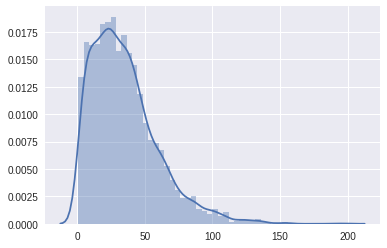

In [90]:
sns.distplot((train_x3_df > 0).sum(axis=1))

Посмотрим количество ненулевых элементов во всей матрице

In [91]:
(train_x3_df > 0).mean().mean()

0.07716501103752758

Весьма разреженная, можно будет попробовать понижение размерности

## Y

Посмотрим на целевые переменные: пять бинарных величин

In [92]:
train_y_df.head()

id  1  2  3  4  5
0   3  1  1  0  0  1
1   5  0  1  0  0  0
2   6  0  1  0  0  0
3   8  1  0  0  0  0
4  10  0  0  1  1  0

In [93]:
train_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
id    4000 non-null int64
1     4000 non-null int64
2     4000 non-null int64
3     4000 non-null int64
4     4000 non-null int64
5     4000 non-null int64
dtypes: int64(6)
memory usage: 187.6 KB


Распределение таргетов

<BarContainer object of 5 artists>

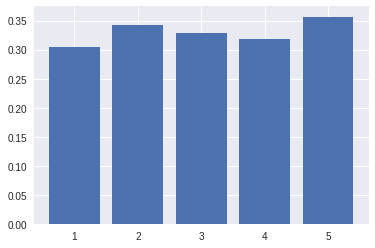

In [94]:
plt.bar(x=train_y_df.columns[1:], height=train_y_df.iloc[:, 1:].mean())

Посмотрим, все ли комбинации возможны

In [95]:
len(set(tuple(t[1:]) for t in train_y_df.values))

32

Да, встречаются все комбинации

Проверим, насколько скоррелированы разные таргеты. Для этого будем строить дерево макимальной глубины, которое по четырем переменным предсказывает оставшуюся. Бейзлайны в этом случае - константное предсказание 0, как наиболее вероятного значения. Их качество:

In [96]:
1 - train_y_df.iloc[:, 1:].mean()

1    0.69625
2    0.65775
3    0.67175
4    0.68150
5    0.64325
dtype: float64

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [98]:
m = DecisionTreeClassifier()

0.6825


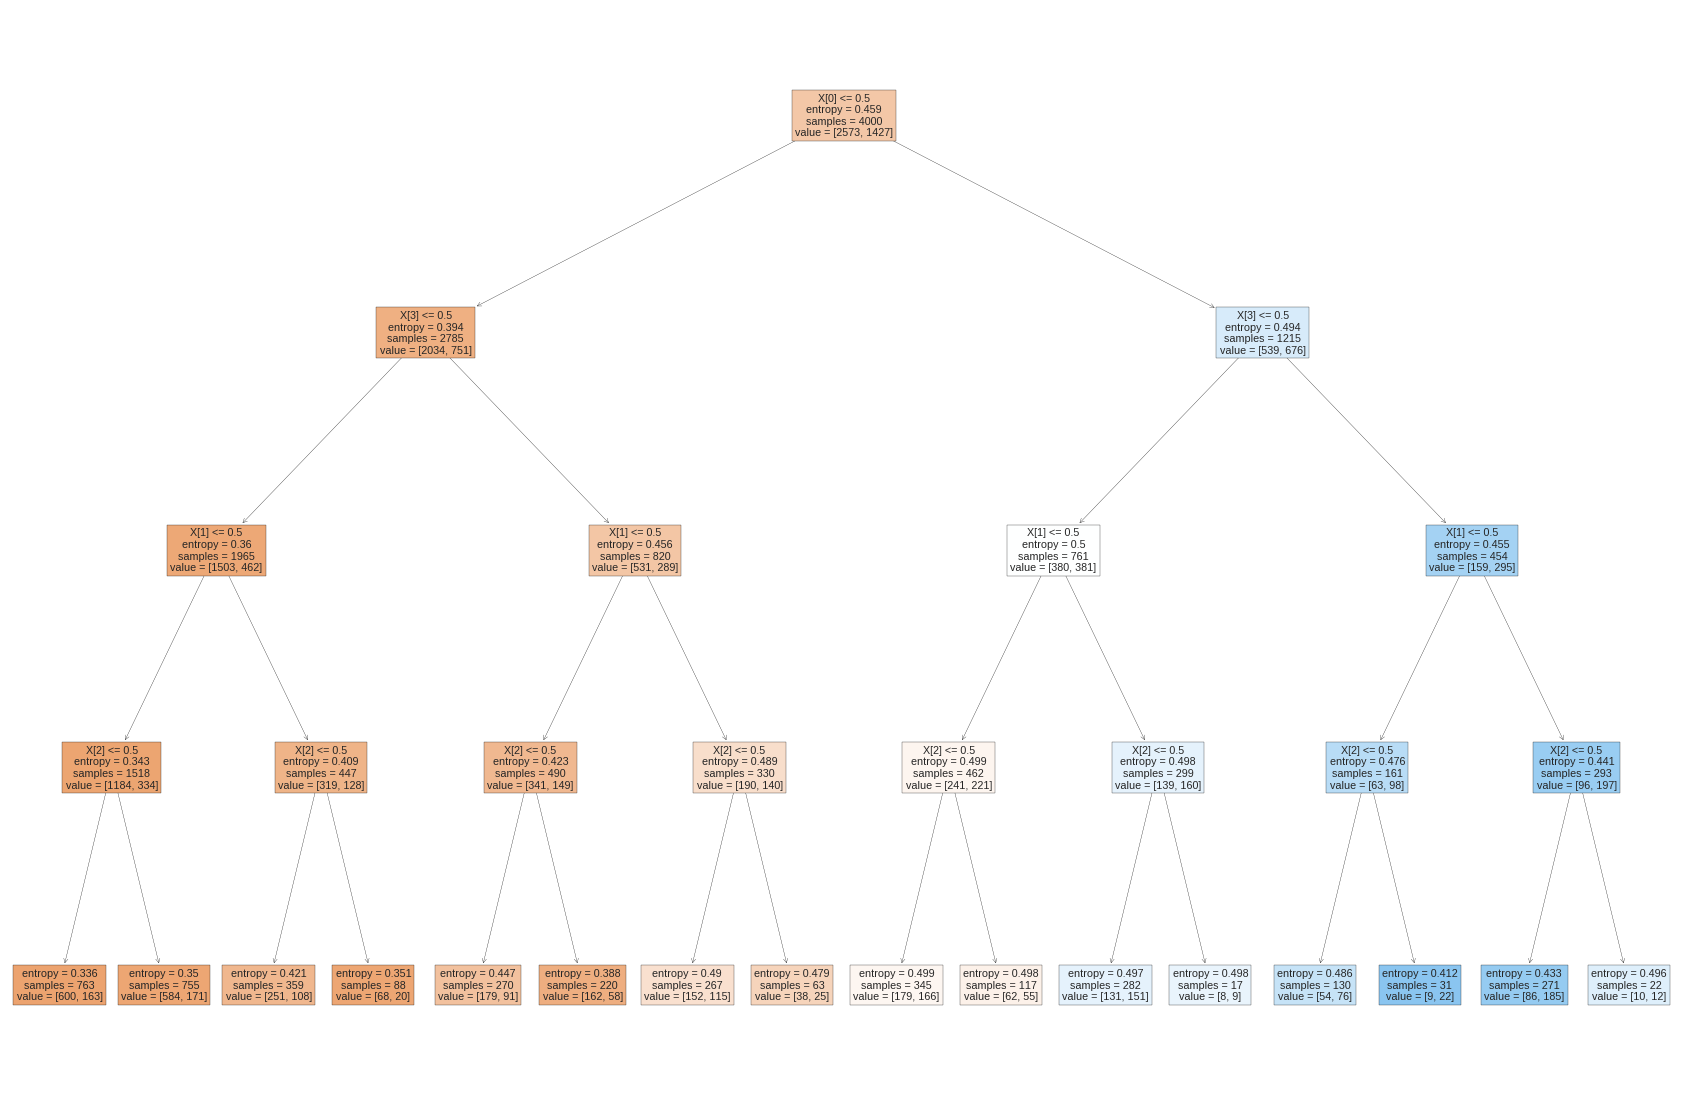

In [99]:
m.fit(train_y_df[["1", "2", "3", "4"]], train_y_df["5"])
print(m.score(train_y_df[["1", "2", "3", "4"]], train_y_df["5"]))
plt.figure(figsize=[30, 20])
tree.plot_tree(m, filled=True)
None

0.69425


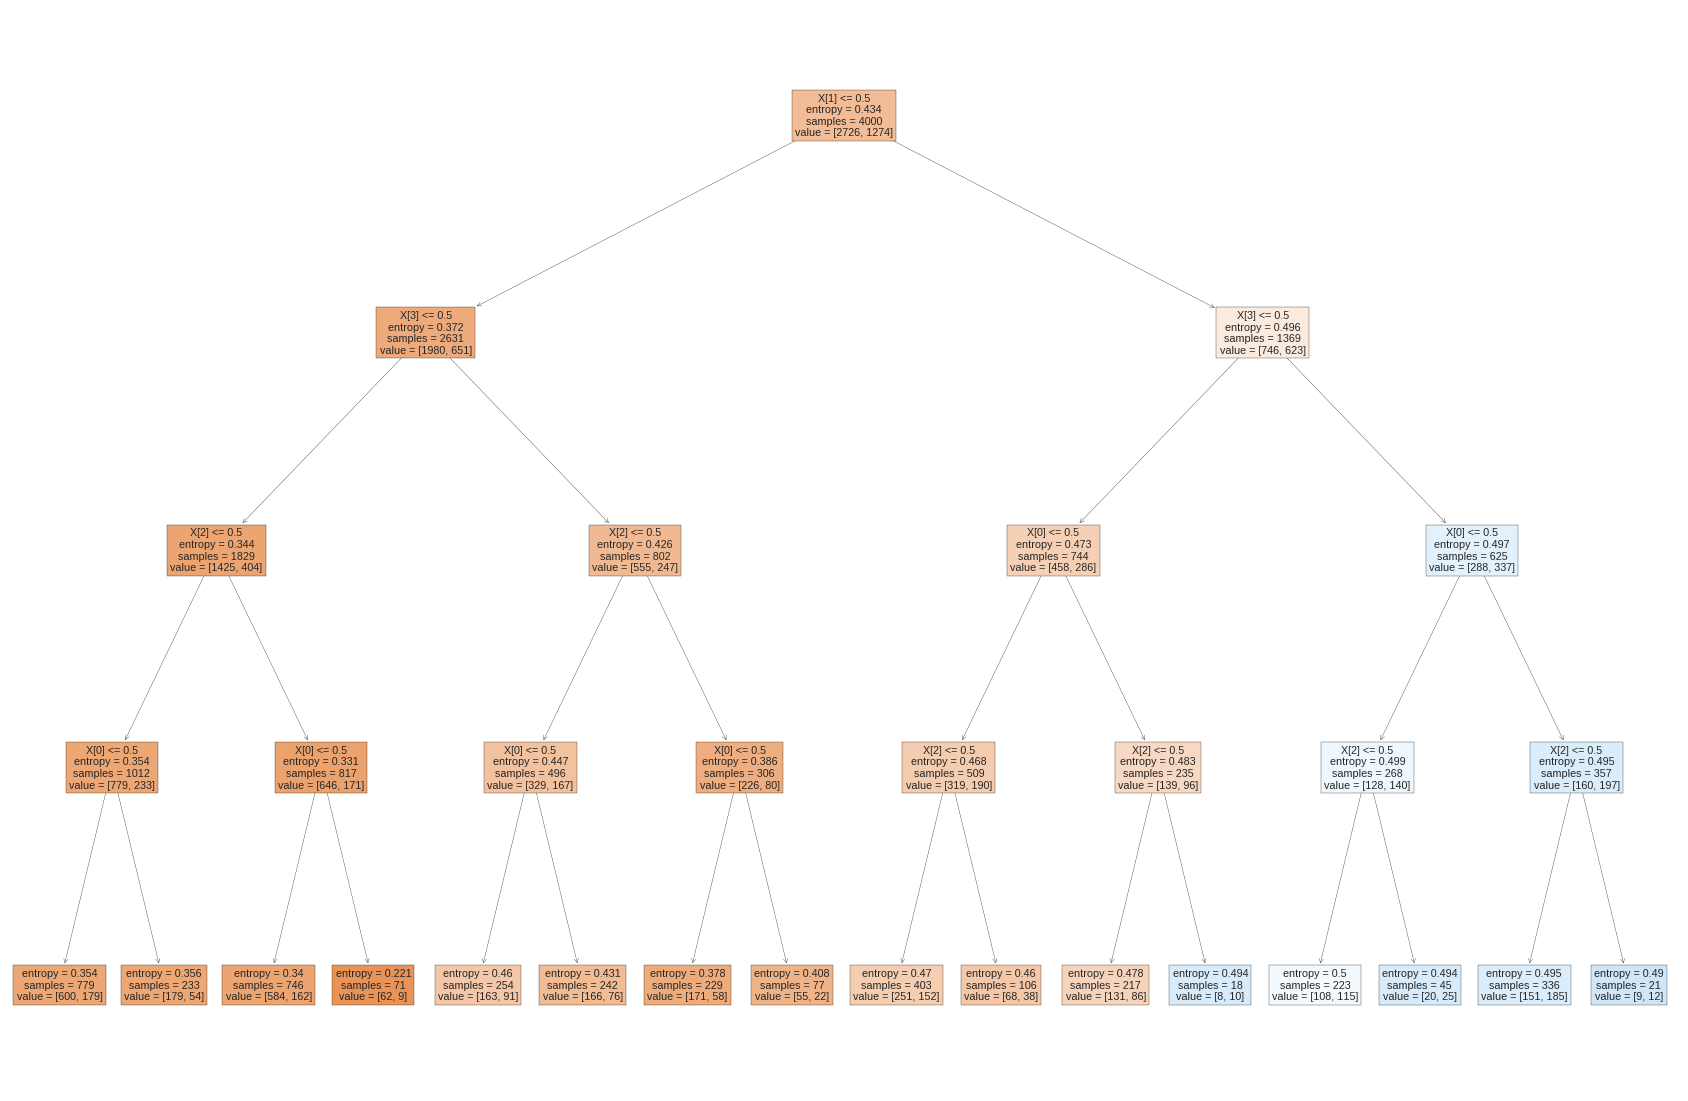

In [100]:
m.fit(train_y_df[["1", "2", "3", "5"]], train_y_df["4"])
print(m.score(train_y_df[["1", "2", "3", "5"]], train_y_df["4"]))
plt.figure(figsize=[30, 20])
tree.plot_tree(m, filled=True)
None

0.67375


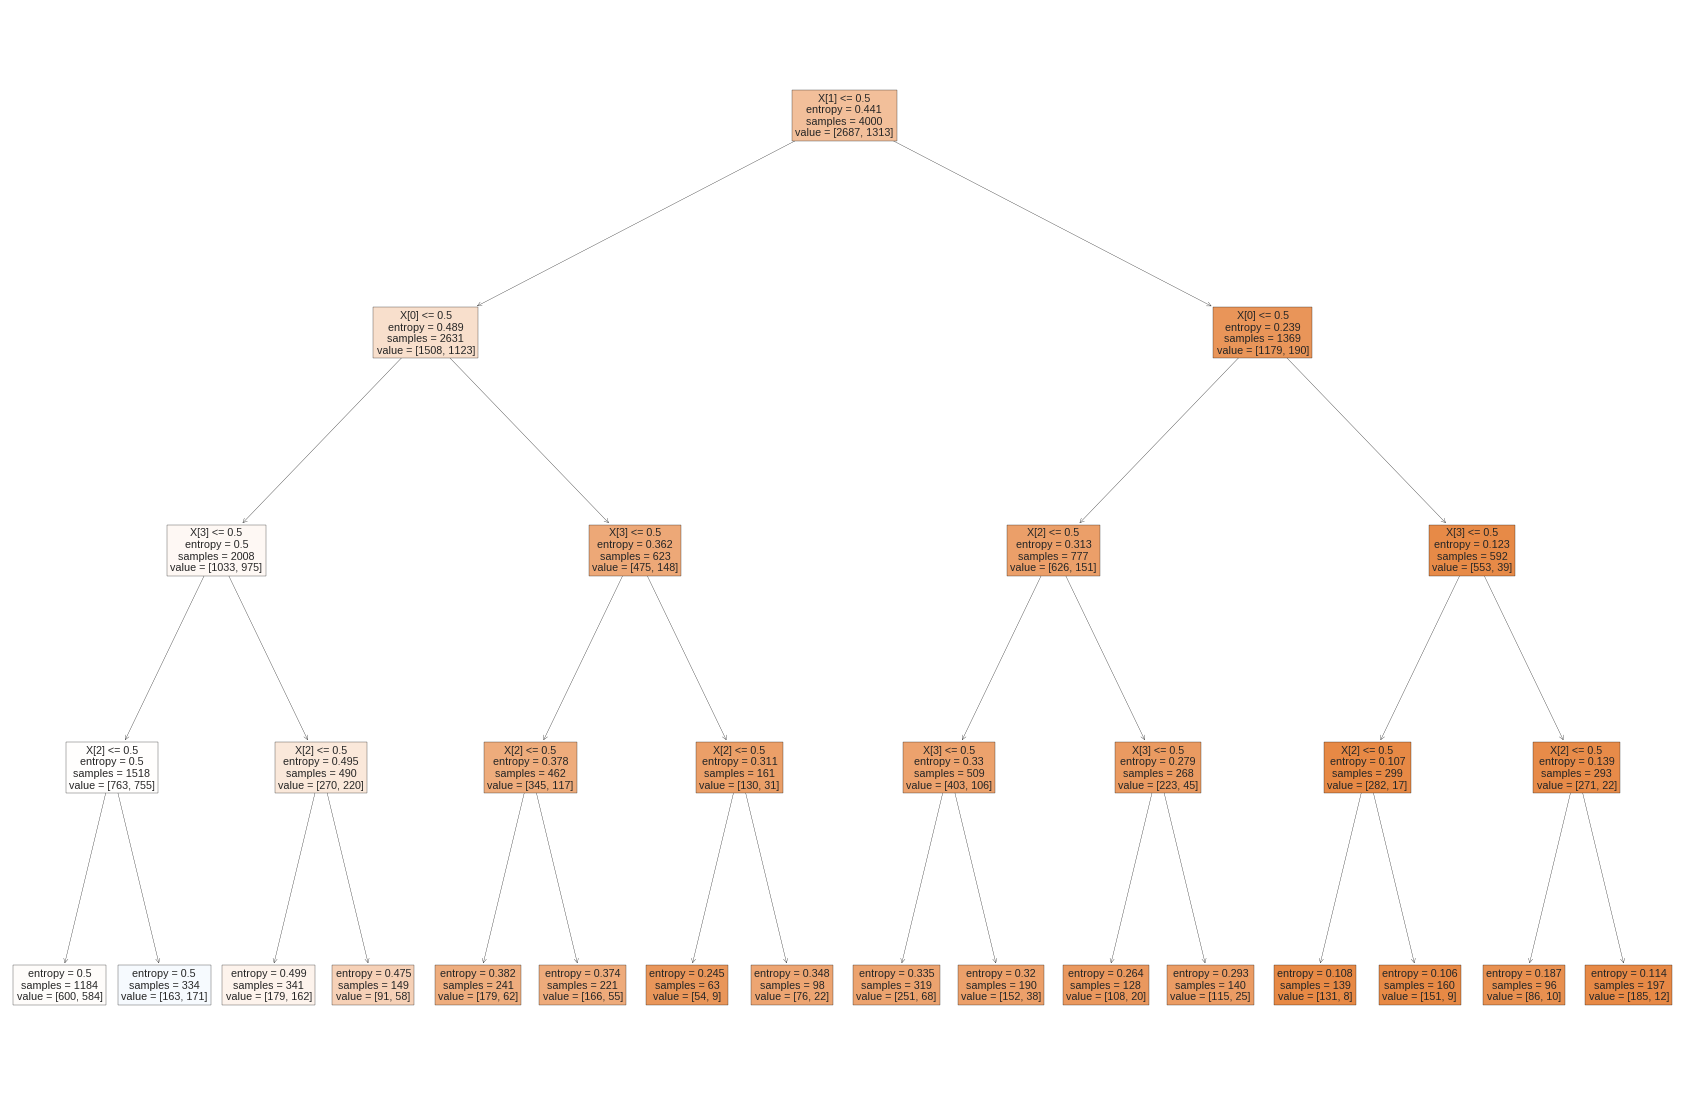

In [101]:
m.fit(train_y_df[["1", "2", "5", "4"]], train_y_df["3"])
print(m.score(train_y_df[["1", "2", "5", "4"]], train_y_df["3"]))
plt.figure(figsize=[30, 20])
tree.plot_tree(m, filled=True)
None

0.69925


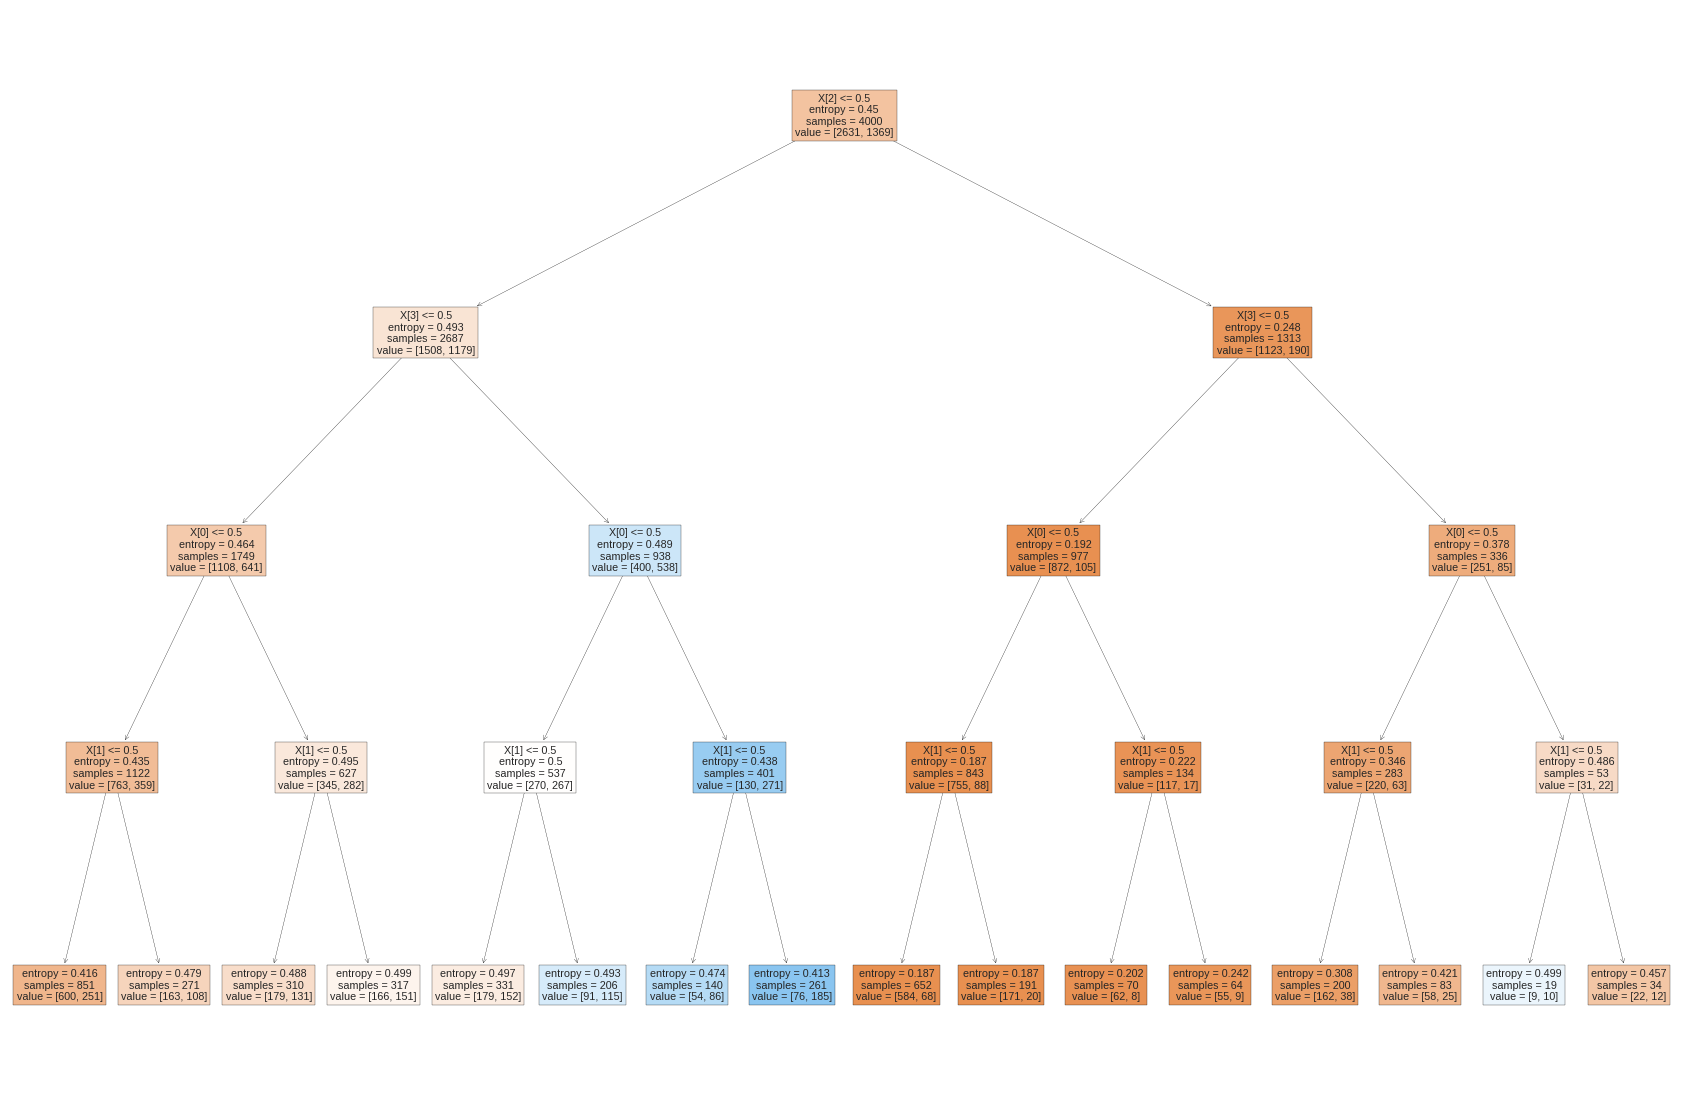

In [102]:
m.fit(train_y_df[["1", "5", "3", "4"]], train_y_df["2"])
print(m.score(train_y_df[["1", "5", "3", "4"]], train_y_df["2"]))
plt.figure(figsize=[30, 20])
tree.plot_tree(m, filled=True)
None

0.72525


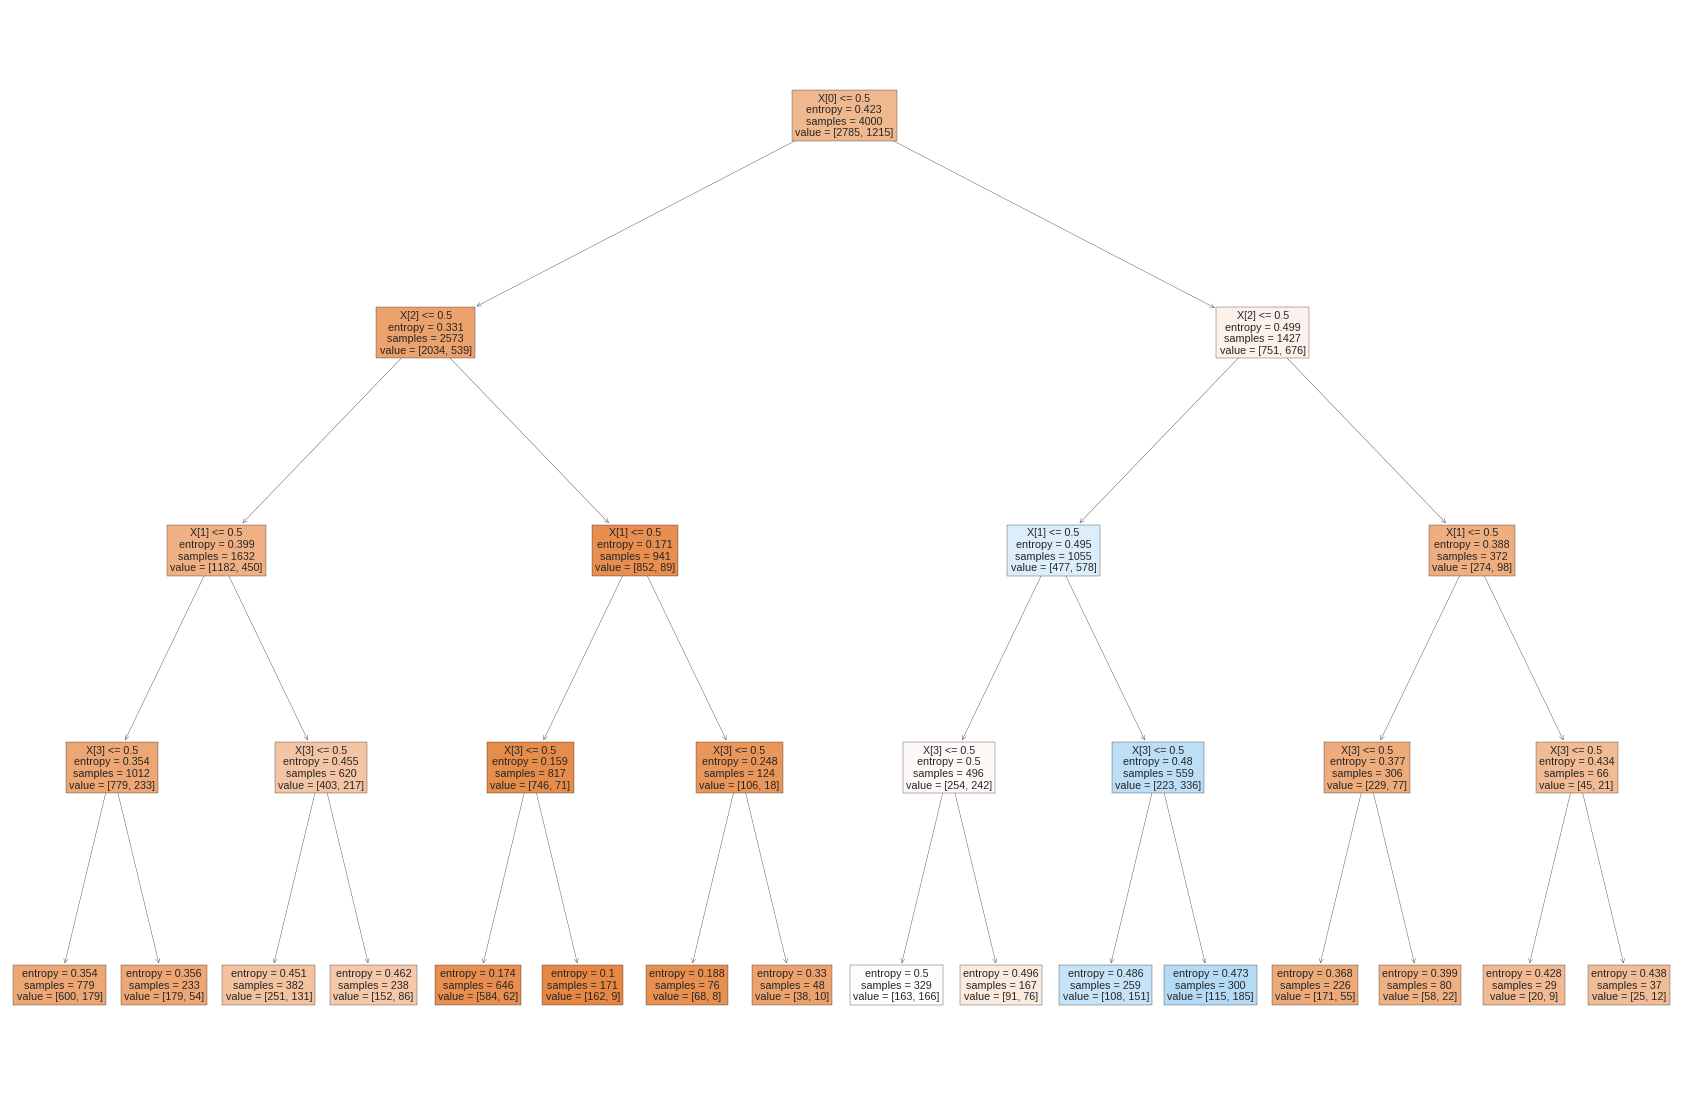

In [103]:
m.fit(train_y_df[["5", "2", "3", "4"]], train_y_df["1"])
print(m.score(train_y_df[["5", "2", "3", "4"]], train_y_df["1"]))
plt.figure(figsize=[30, 20])
tree.plot_tree(m, filled=True)
None

Различие очень небольшое, хотя и есть. Похоже что смысла использовать что-то отличное от пяти независимых моделей на верхнем уровне нет

В целом EDA и поиск выбросов произведен. Далее планируется вынести куски кода в класс для загрузки данных в память. Класс будет инкапсулировать все предобработки(очевидно необходимые, типа исключения константных признаков, и опциональные, типа исключения выбросов)